In [1]:
import pandas as pd
import json

with open('../data/ligue1/3900493.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
df = pd.DataFrame(data)

print(df)


                                        id  index  period     timestamp  \
0     35a90527-eae8-4d50-a199-224be6fe0634      1       1  00:00:00.000   
1     1c592654-7a39-4a39-aebb-836fe5c2365e      2       1  00:00:00.000   
2     5a8a1e07-ab1a-4b89-84b8-7f73300b0285      3       1  00:00:00.000   
3     f83c76a5-8cdc-4789-9a87-408b41a3ea49      4       1  00:00:00.000   
4     ef82eaf9-aae4-44a7-9086-8817fb8f9685      5       1  00:00:00.382   
...                                    ...    ...     ...           ...   
3843  77dbd825-9440-4747-b440-d05aefa4b0b8   3844       2  00:48:59.999   
3844  e3ae01b8-d425-4db4-9fe0-a0fbd4e20271   3845       2  00:49:00.348   
3845  92d462ac-b48c-41f5-abe2-16463dde1822   3846       2  00:49:02.298   
3846  dbf29c41-ef5c-4b20-94dd-633a8bb494f1   3847       2  00:49:02.298   
3847  c94595b2-3326-4d65-a8d1-1f0fa361f5fc   3848       2  00:49:02.423   

      minute  second                                 type  possession  \
0          0       0    {'

In [2]:
df_normalize = pd.json_normalize(data)

print(df_normalize)

                                        id  index  period     timestamp  \
0     35a90527-eae8-4d50-a199-224be6fe0634      1       1  00:00:00.000   
1     1c592654-7a39-4a39-aebb-836fe5c2365e      2       1  00:00:00.000   
2     5a8a1e07-ab1a-4b89-84b8-7f73300b0285      3       1  00:00:00.000   
3     f83c76a5-8cdc-4789-9a87-408b41a3ea49      4       1  00:00:00.000   
4     ef82eaf9-aae4-44a7-9086-8817fb8f9685      5       1  00:00:00.382   
...                                    ...    ...     ...           ...   
3843  77dbd825-9440-4747-b440-d05aefa4b0b8   3844       2  00:48:59.999   
3844  e3ae01b8-d425-4db4-9fe0-a0fbd4e20271   3845       2  00:49:00.348   
3845  92d462ac-b48c-41f5-abe2-16463dde1822   3846       2  00:49:02.298   
3846  dbf29c41-ef5c-4b20-94dd-633a8bb494f1   3847       2  00:49:02.298   
3847  c94595b2-3326-4d65-a8d1-1f0fa361f5fc   3848       2  00:49:02.423   

      minute  second  possession  duration  type.id      type.name  ...  \
0          0       0    

In [3]:
shot = df_normalize[df_normalize['type.name'] == 'Shot']

print(len(shot))

38


In [4]:
shot_team = df_normalize[df_normalize['type.name'] == 'Shot']['team.name'].value_counts()
print(shot_team)

team.name
Lyon      30
Troyes     8
Name: count, dtype: int64


In [5]:
pass_team = df_normalize[df_normalize['type.name'] == 'Pass']['team.name'].value_counts()
print(pass_team)

team.name
Lyon      745
Troyes    345
Name: count, dtype: int64


In [6]:
passe = df_normalize[df_normalize['type.name'] == 'Pass']

pass_complete = passe[passe['pass.outcome.name'].isna()]

pass_completeteam = pass_complete['team.name'].value_counts()

print(pass_completeteam)


team.name
Lyon      644
Troyes    237
Name: count, dtype: int64


In [7]:
team = df_normalize['team.name'].unique()

goal = shot[shot['shot.outcome.name'] == 'Goal']
goalteam = goal['team.name'].value_counts().reindex(team, fill_value=0)

print('Score final : ')
print(goalteam)

Score final : 
team.name
Troyes    0
Lyon      1
Name: count, dtype: int64


In [8]:
pass_player = pass_complete['player.name'].value_counts()

best_player = pass_player.head(3)

print(best_player)


player.name
Christophe Jallet    101
Jordan Ferri          93
Corentin Tolisso      86
Name: count, dtype: int64


In [9]:
stat_player = []
for i in passe['player.name'].unique():
    pass_byplayer = passe[passe['player.name'] == i]
    success_pass = pass_byplayer[pass_byplayer['pass.outcome.name'].isna()].shape[0]
    total = pass_byplayer.shape[0]
    taux = round((success_pass / total * 100),2) if total > 0 else 0

    position = pass_byplayer['position.name'].iloc[0]
    team = pass_byplayer['team.name'].iloc[0]
    
    stat_player.append({'joueur': i, 'équipe': team, 'position': position, 'passes_réussies': success_pass, 'passes_totales': total, 'taux': taux})

stat_df = pd.DataFrame(stat_player)
stat_df = stat_df.sort_values('passes_réussies', ascending=False)

print(stat_df)

                        joueur  équipe                   position  \
9            Christophe Jallet    Lyon                 Right Back   
10                Jordan Ferri    Lyon      Right Center Midfield   
18            Corentin Tolisso    Lyon  Center Defensive Midfield   
14            Mathieu Valbuena    Lyon  Center Attacking Midfield   
11           Mapou Yanga-Mbiwa    Lyon           Left Center Back   
12           Sergi Darder Moll    Lyon       Left Center Midfield   
15                Jérémy Morel    Lyon                  Left Back   
17             Maxime Gonalons    Lyon          Right Center Back   
3             Stéphane Darbion  Troyes                 Right Wing   
6                Thomas Ayasse  Troyes   Right Defensive Midfield   
16             Claudio Beauvue    Lyon       Right Center Forward   
22            Lossémy Karaboué  Troyes                 Right Back   
8              Mouhamadou Dabo  Troyes                  Left Back   
13                    Jessy Pi  Tr

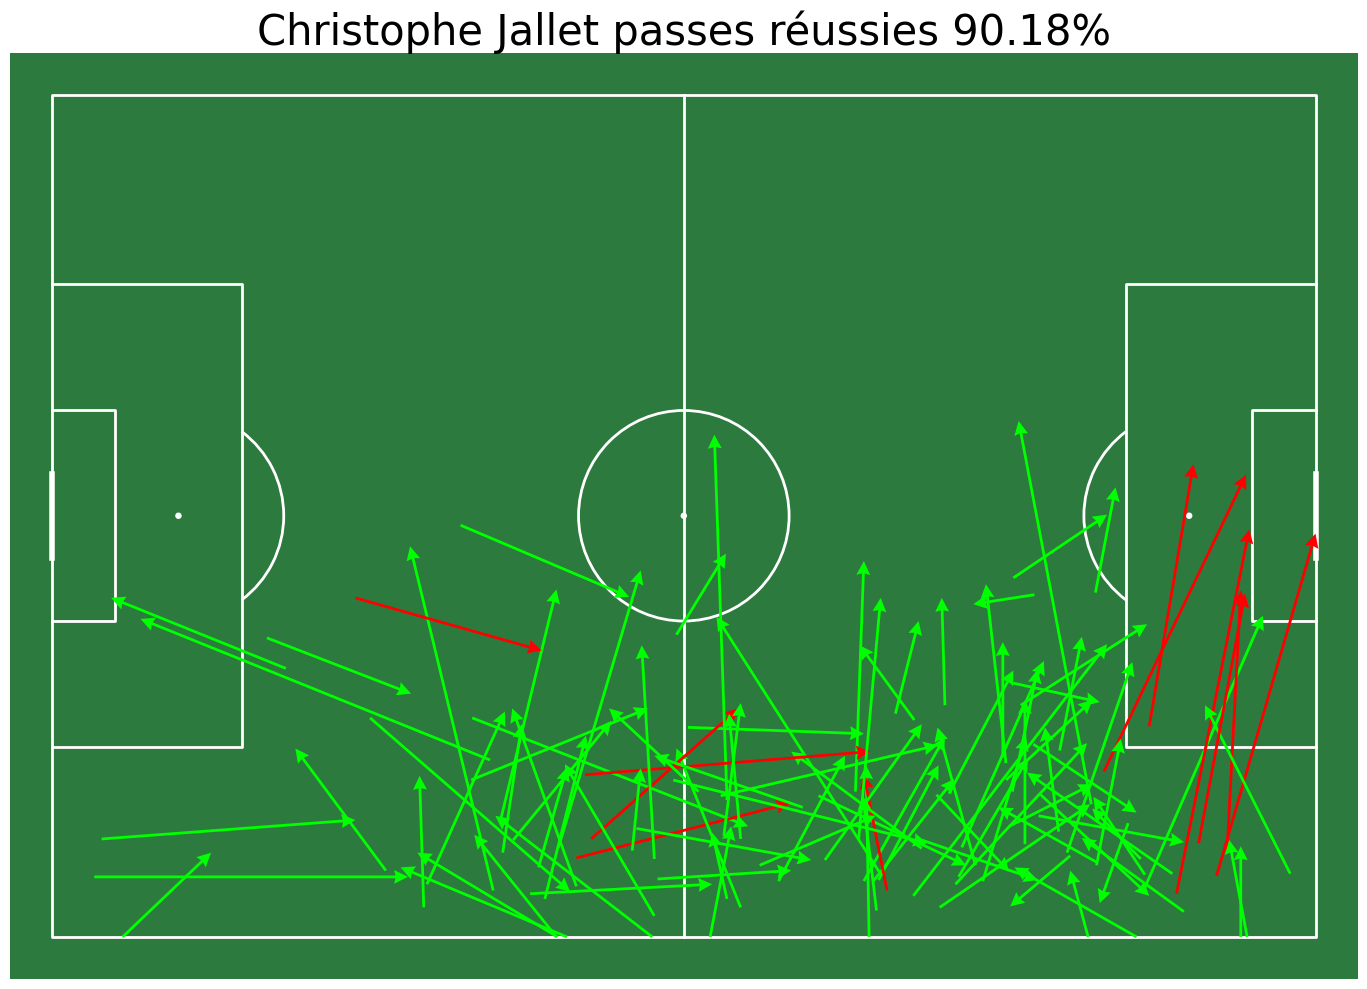

In [10]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

passeur = stat_df.iloc[0]['joueur']
passeur_success = stat_df.iloc[0]['passes_réussies']
passeur_total = stat_df.iloc[0]['passes_totales']
passeur_taux = stat_df.iloc[0]['taux']

player_pass = passe[passe['player.name'] == passeur]

pitch = Pitch(pitch_type='statsbomb', pitch_color='#2d7a3e', line_color='white')
fig, ax = pitch.draw(figsize=(15, 10))

for p, row in player_pass.iterrows():
    x_start = row['location'][0]
    y_start = row['location'][1]
    x_end = row['pass.end_location'][0]
    y_end = row['pass.end_location'][1]

    if pd.isna(row['pass.outcome.name']):
        color = 'lime'
    else:
        color='red'
    
    pitch.arrows(x_start, y_start, x_end, y_end, width=2, headwidth=5, headlength=5, color=color, ax=ax)
    
ax_title = ax.set_title(f'{passeur} passes réussies {passeur_taux}%', fontsize=30)
    

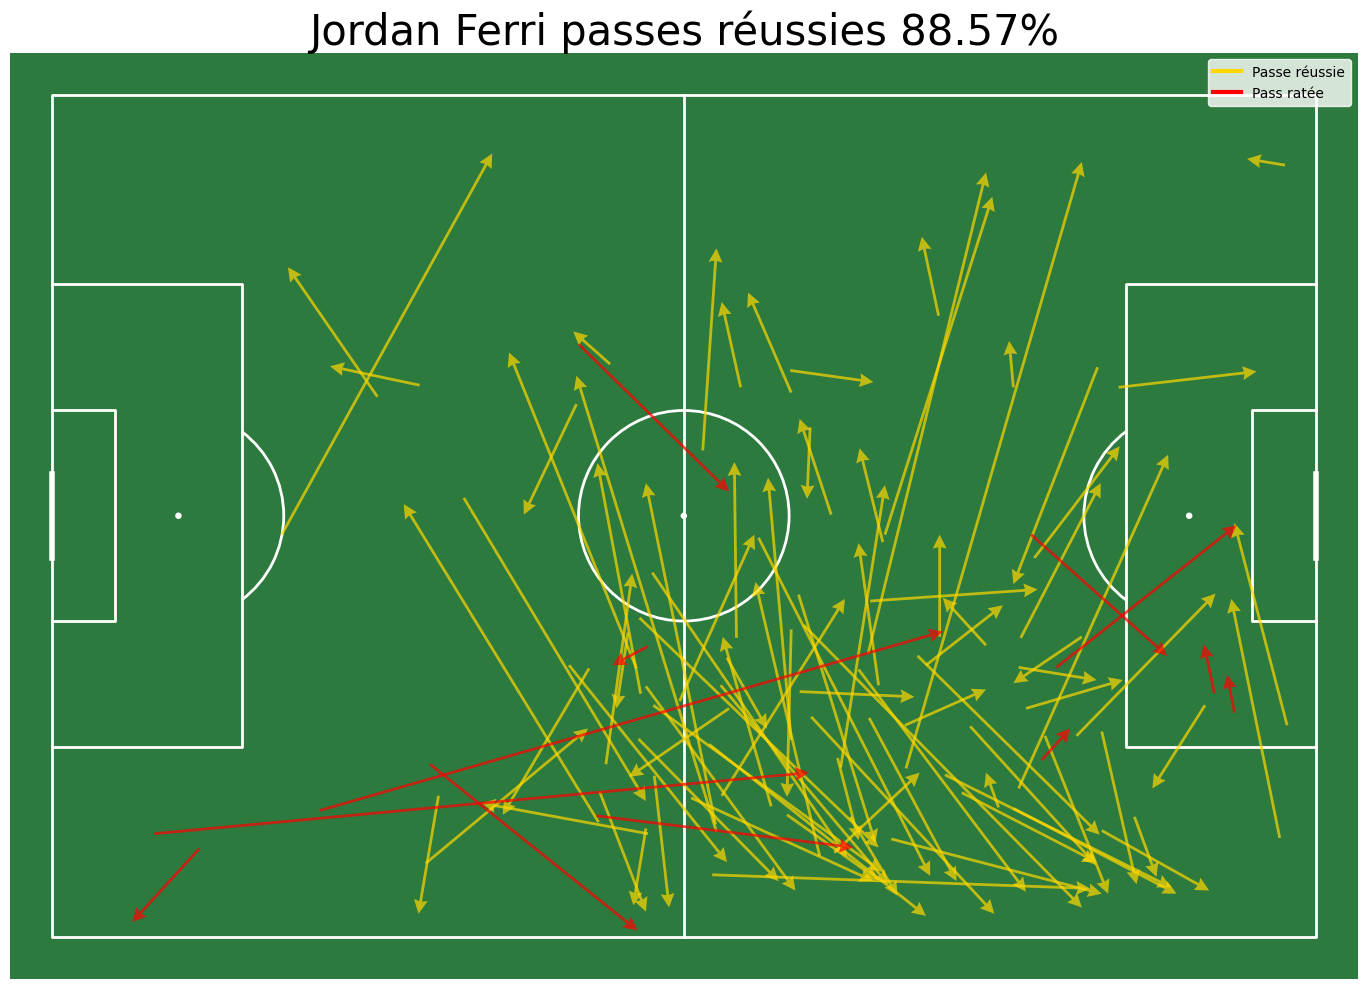

In [22]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.pyplot import Line2D
passeur = stat_df.iloc[1]['joueur']
passeur_success = stat_df.iloc[1]['passes_réussies']
passeur_total = stat_df.iloc[1]['passes_totales']
passeur_taux = stat_df.iloc[1]['taux']

player_pass = passe[passe['player.name'] == passeur]

pitch = Pitch(pitch_type='statsbomb', pitch_color='#2d7a3e', line_color='white')
fig, ax = pitch.draw(figsize=(15, 10))

for p, row in player_pass[player_pass['pass.outcome.name'].isna()].iterrows():
    pitch.arrows(row['location'][0], row['location'][1], row['pass.end_location'][0], row['pass.end_location'][1], width=2, headwidth=5, headlength=5, color='gold', ax=ax, alpha=0.7)

for p, row in player_pass[player_pass['pass.outcome.name'].notna()].iterrows():
    pitch.arrows(row['location'][0], row['location'][1], row['pass.end_location'][0], row['pass.end_location'][1], width=2, headwidth=5, headlength=5, color='red', ax=ax, alpha=0.7)

legend_element = [Line2D([0], [0], color='gold', lw=3, label='Passe réussie'), Line2D([0], [0], lw=3, color='red', label='Pass ratée')]

ax.legend(facecolor='white', handles=legend_element, edgecolor='white', fontsize=10, loc='upper right')
ax_title = ax.set_title(f'{passeur} passes réussies {passeur_taux}%', fontsize=30)
    

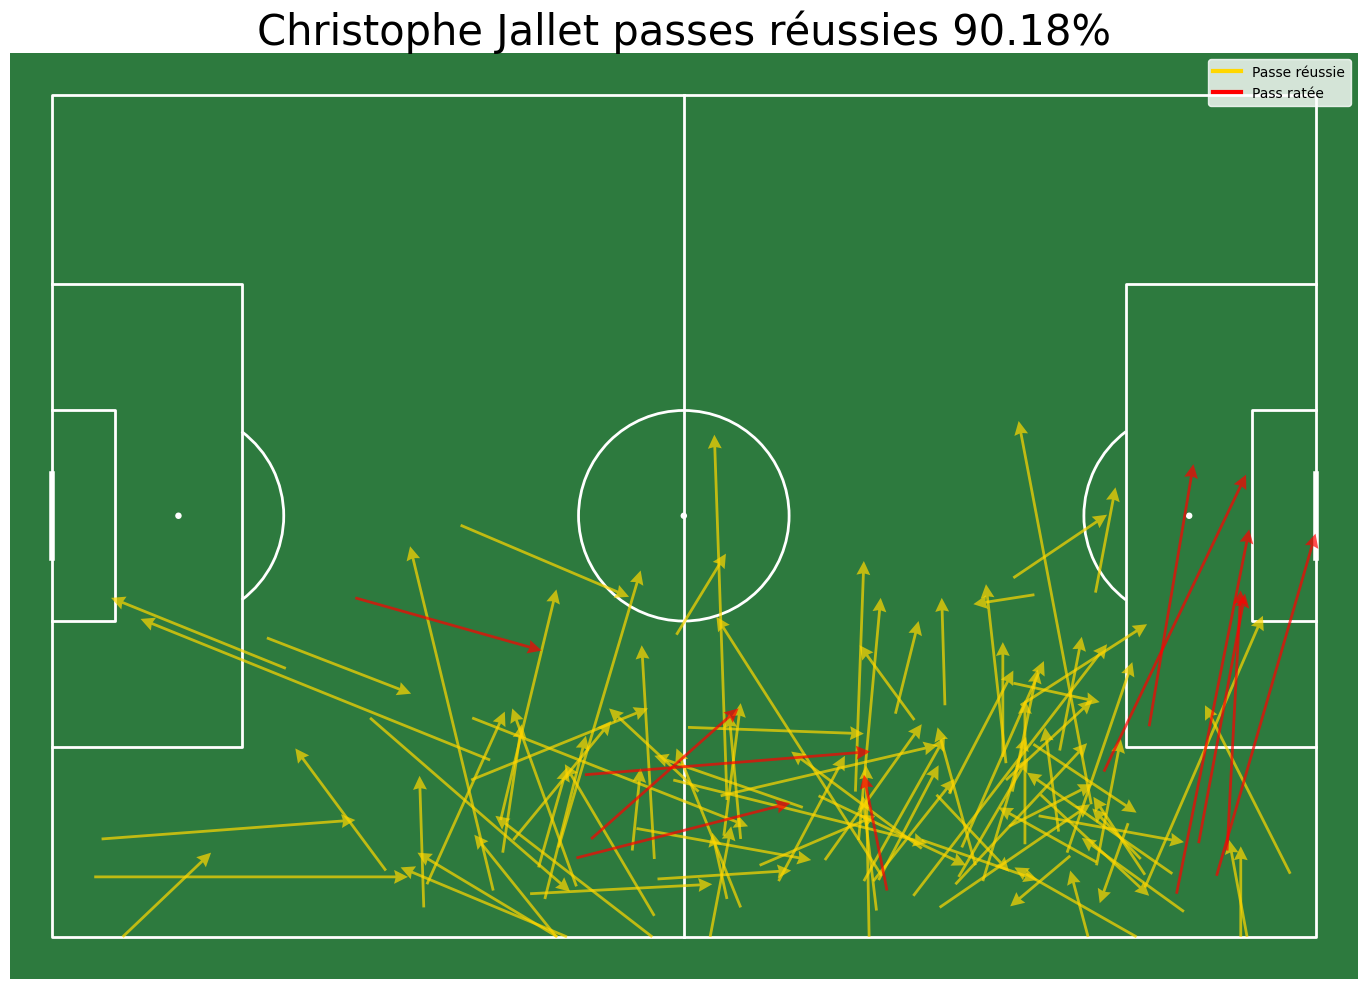

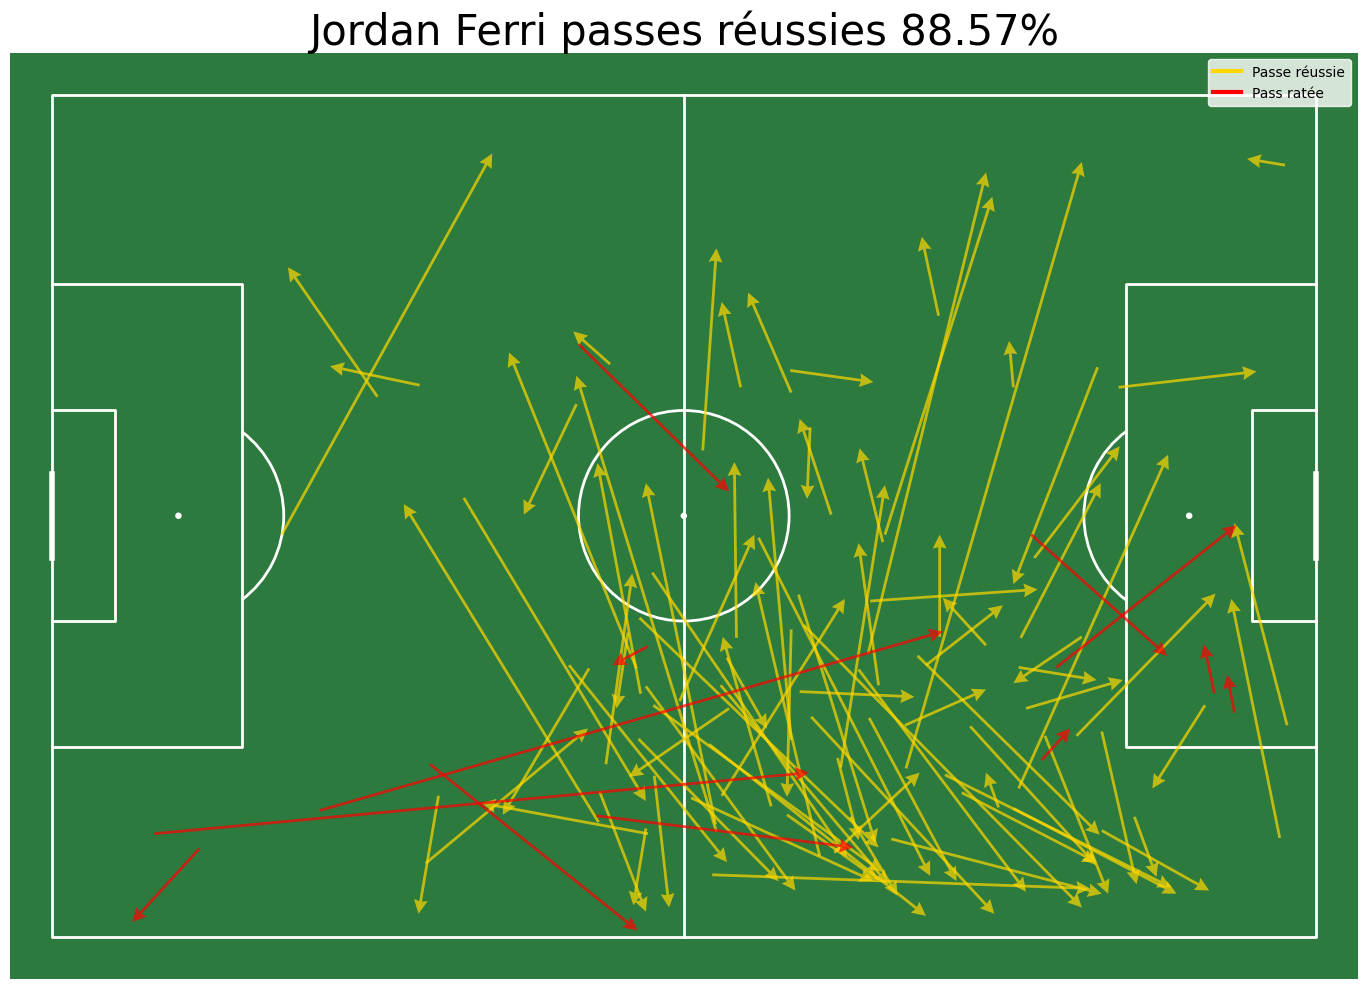

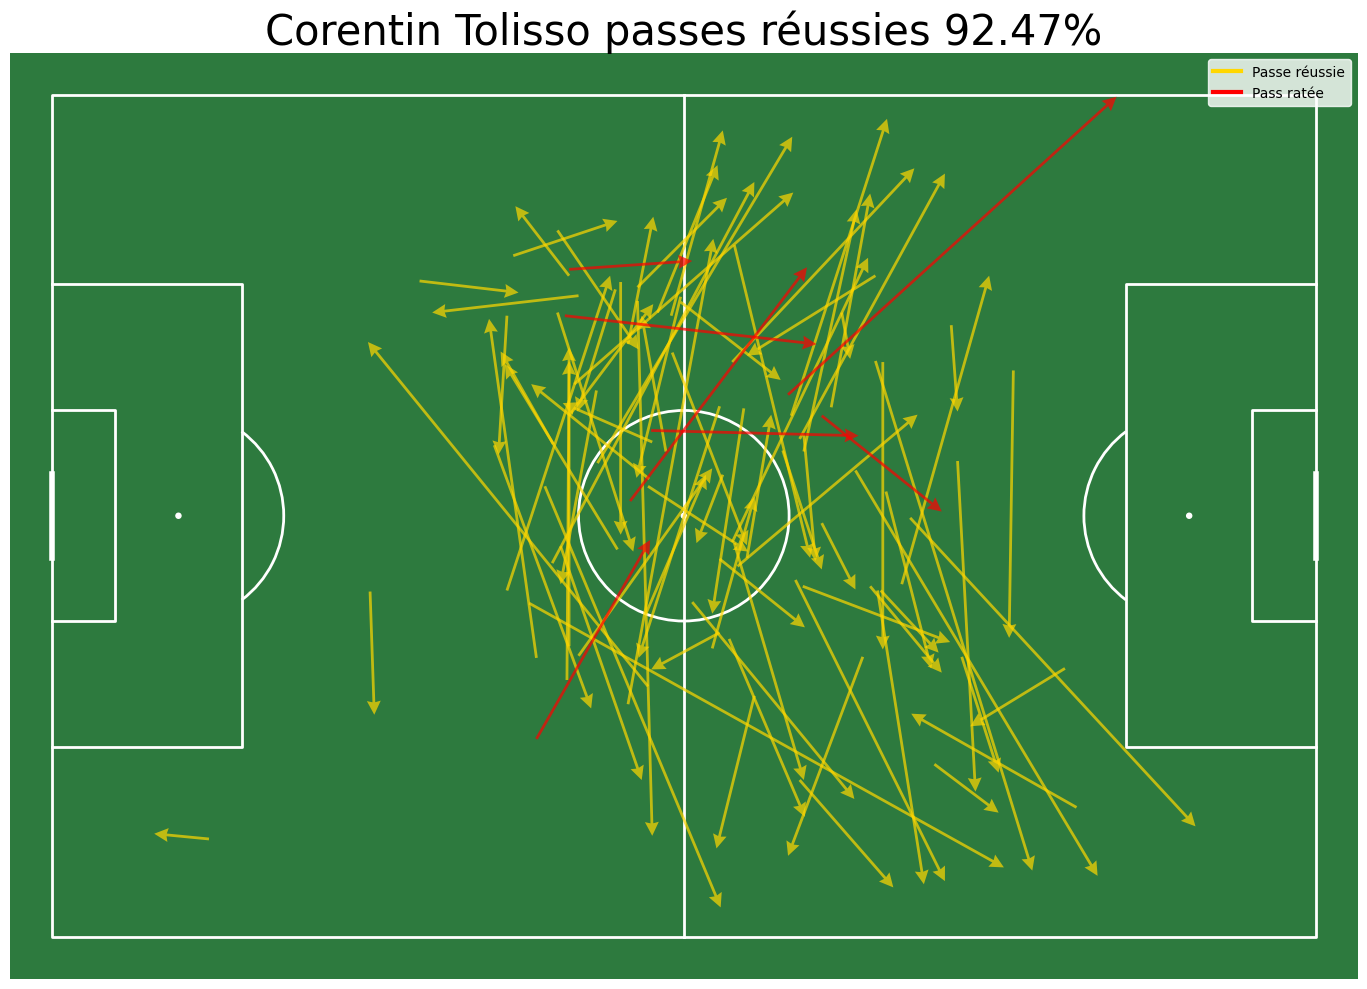

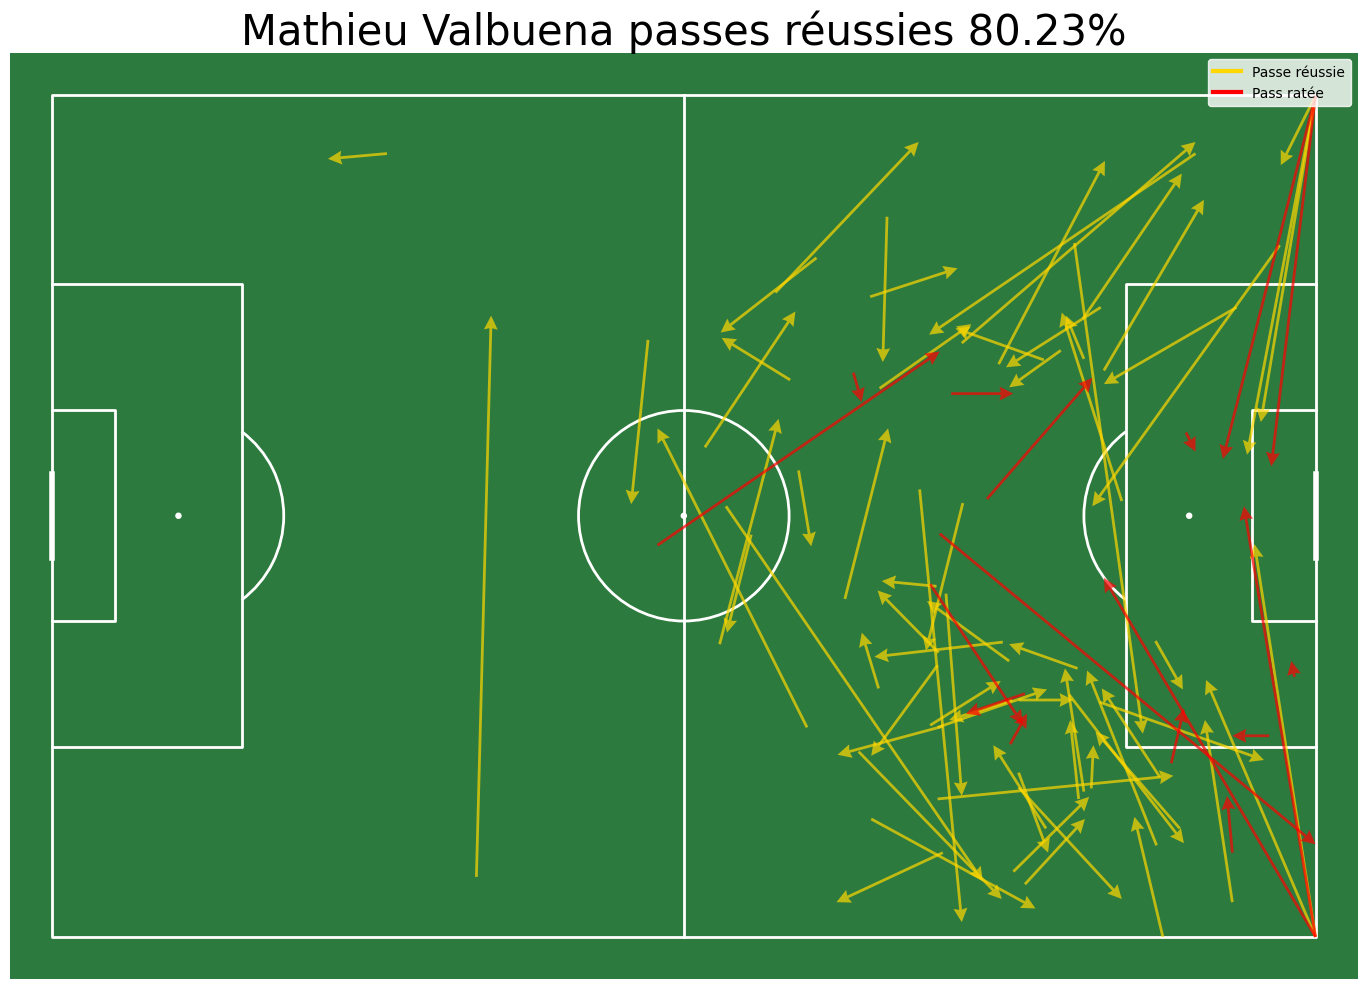

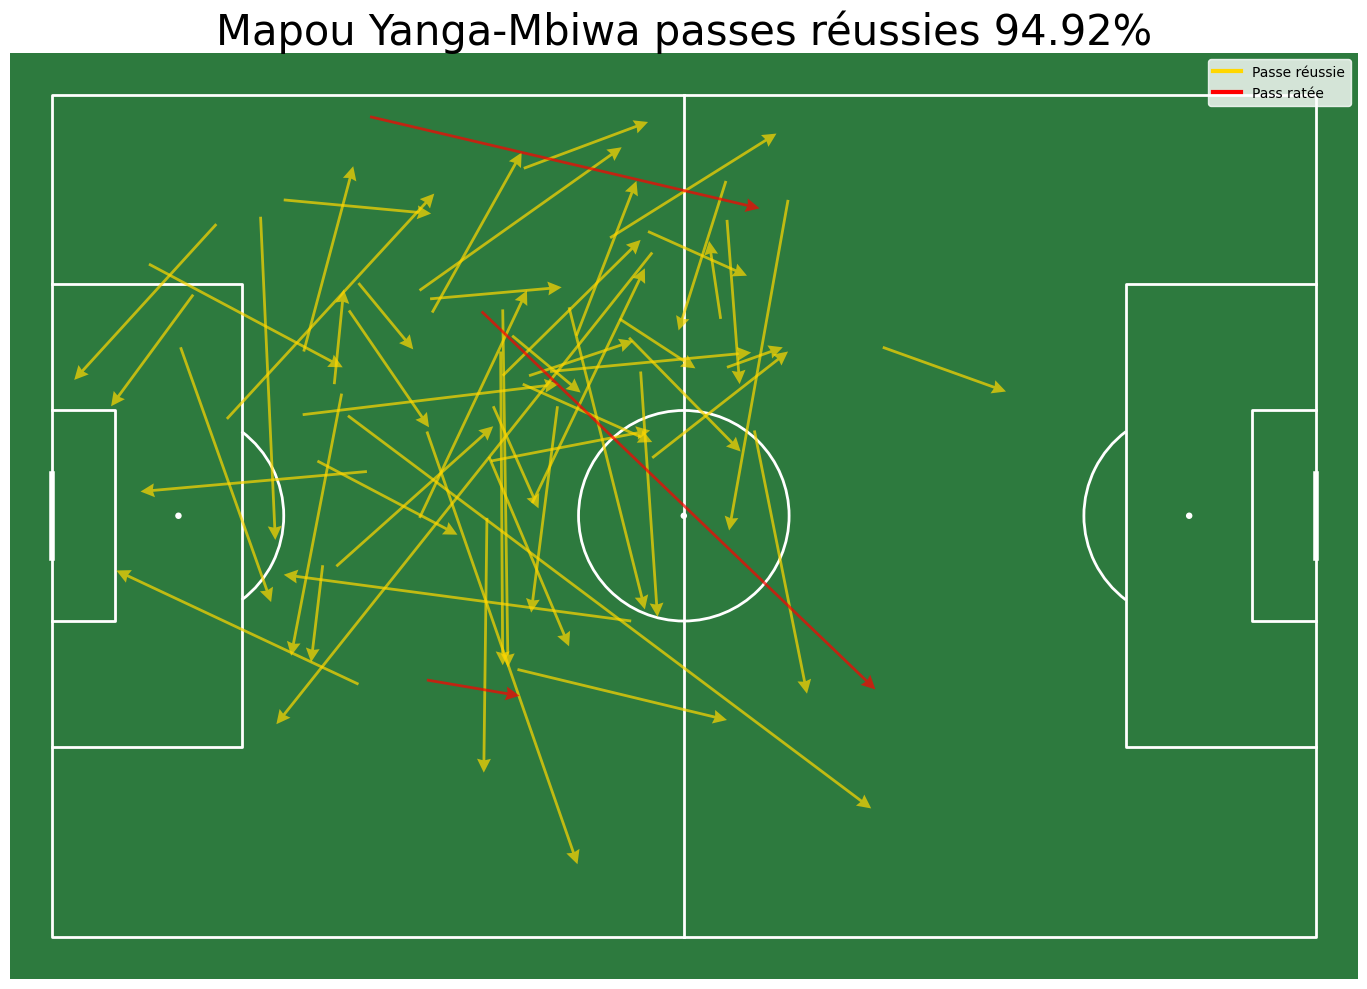

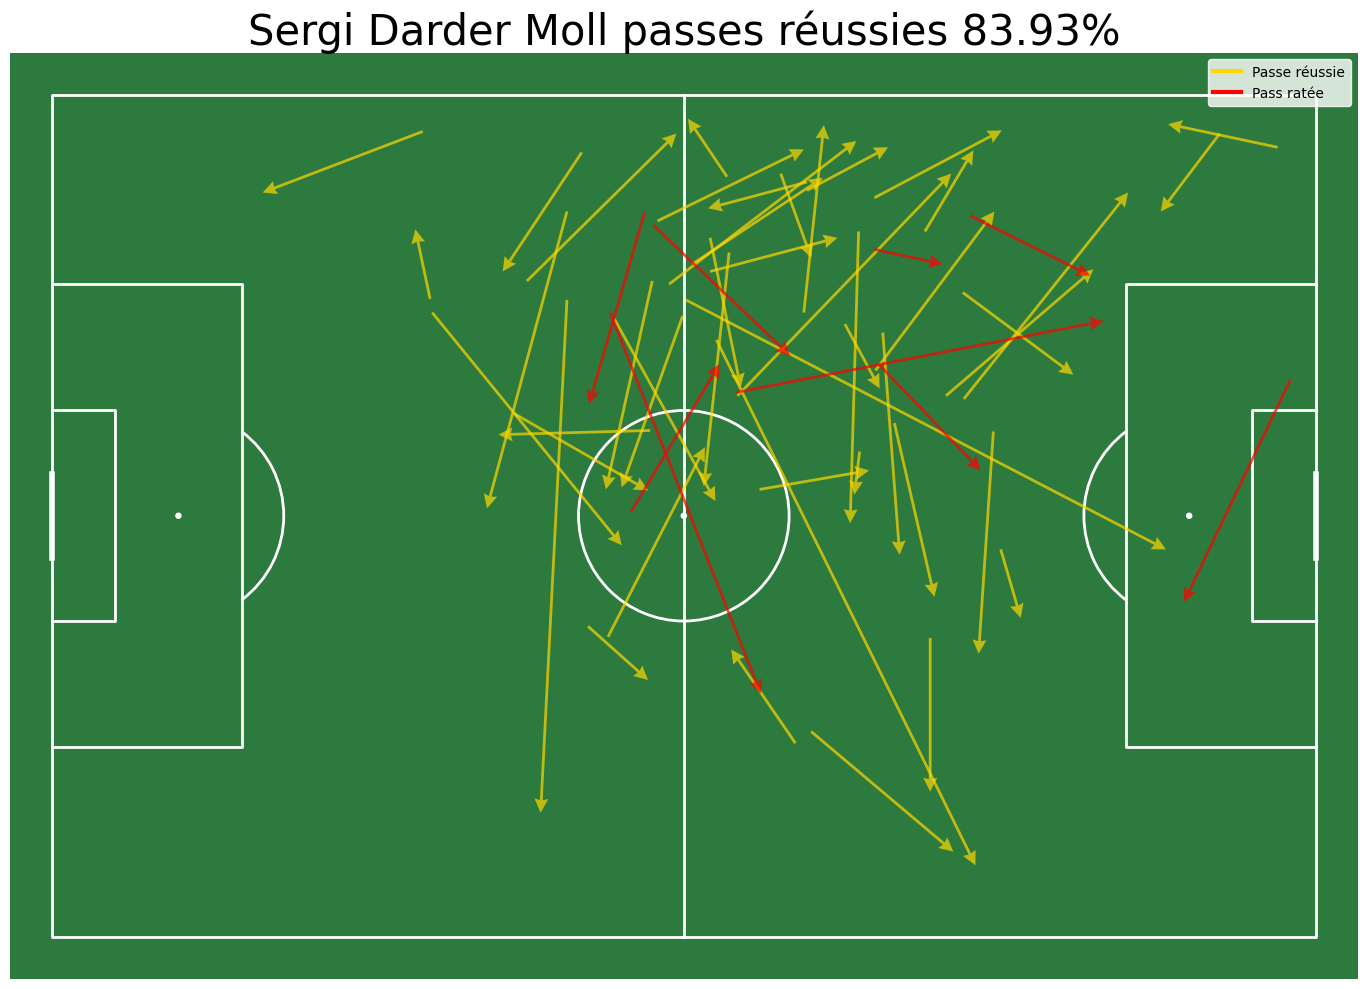

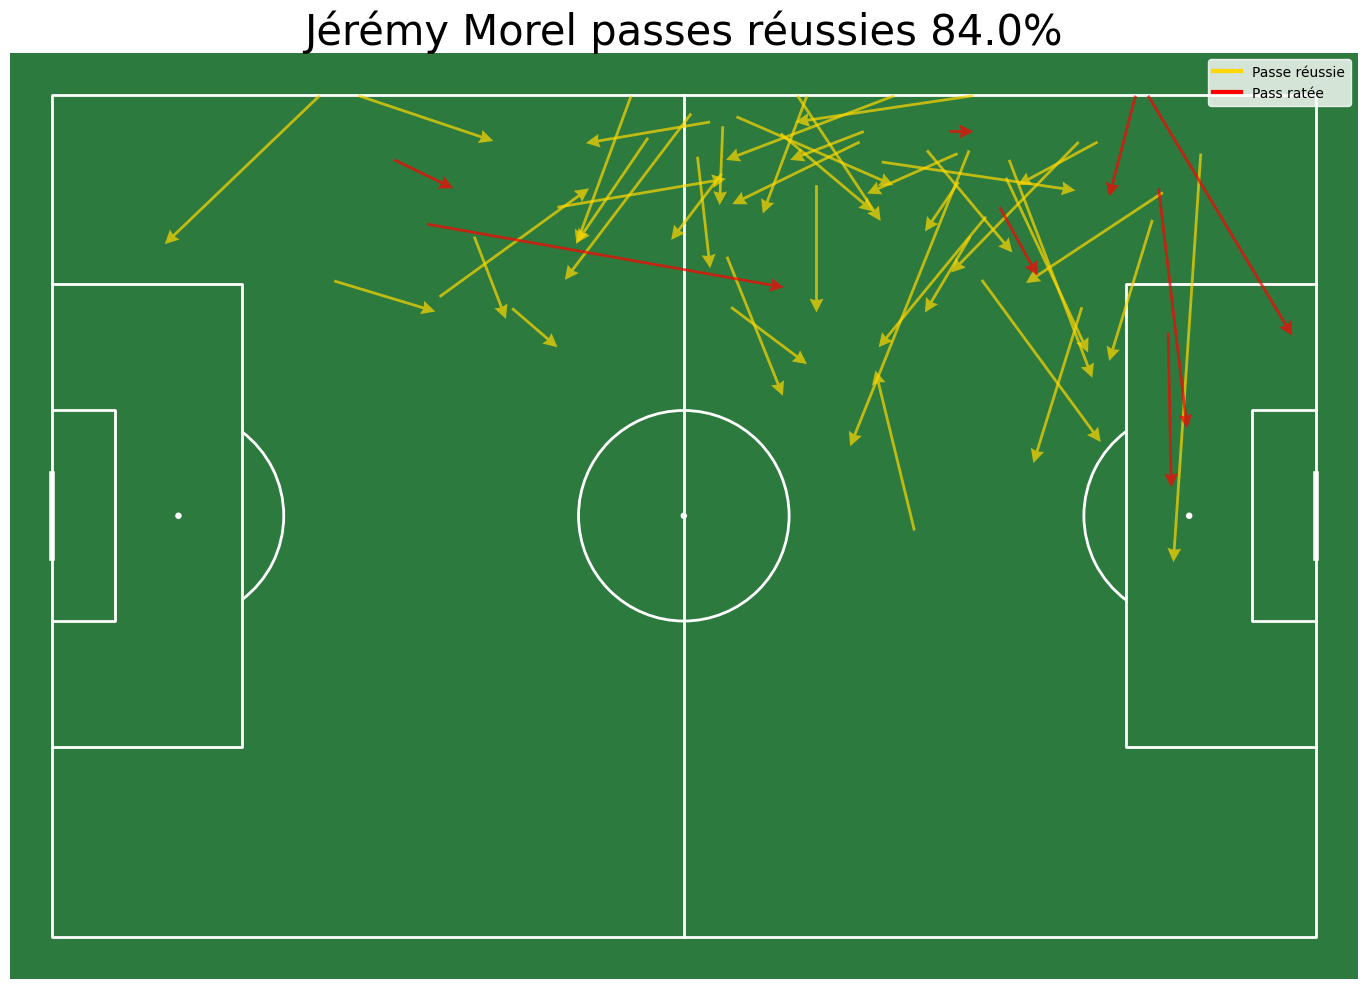

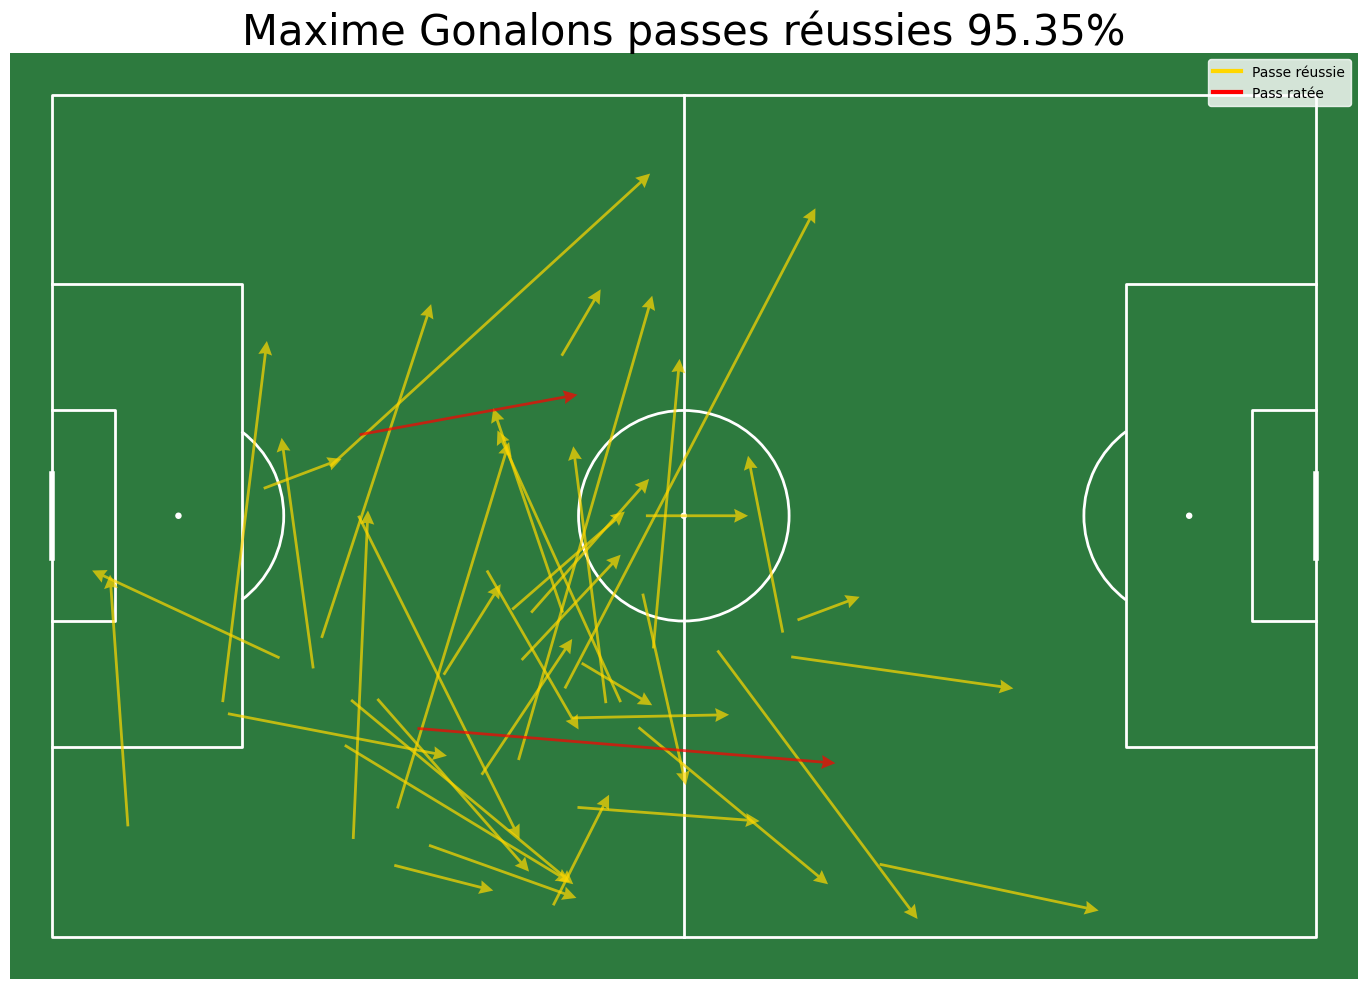

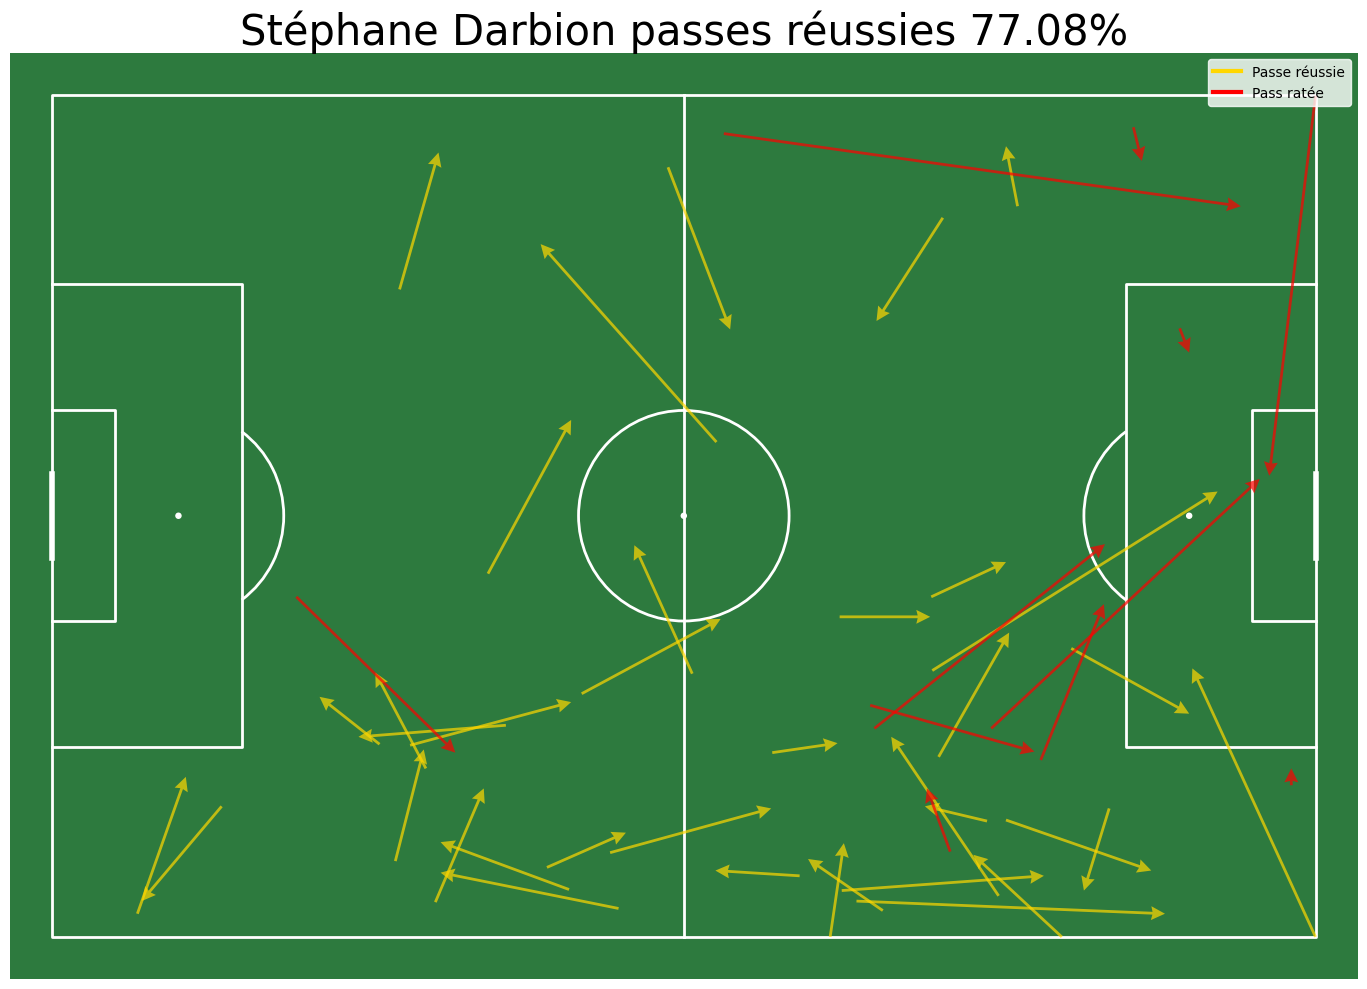

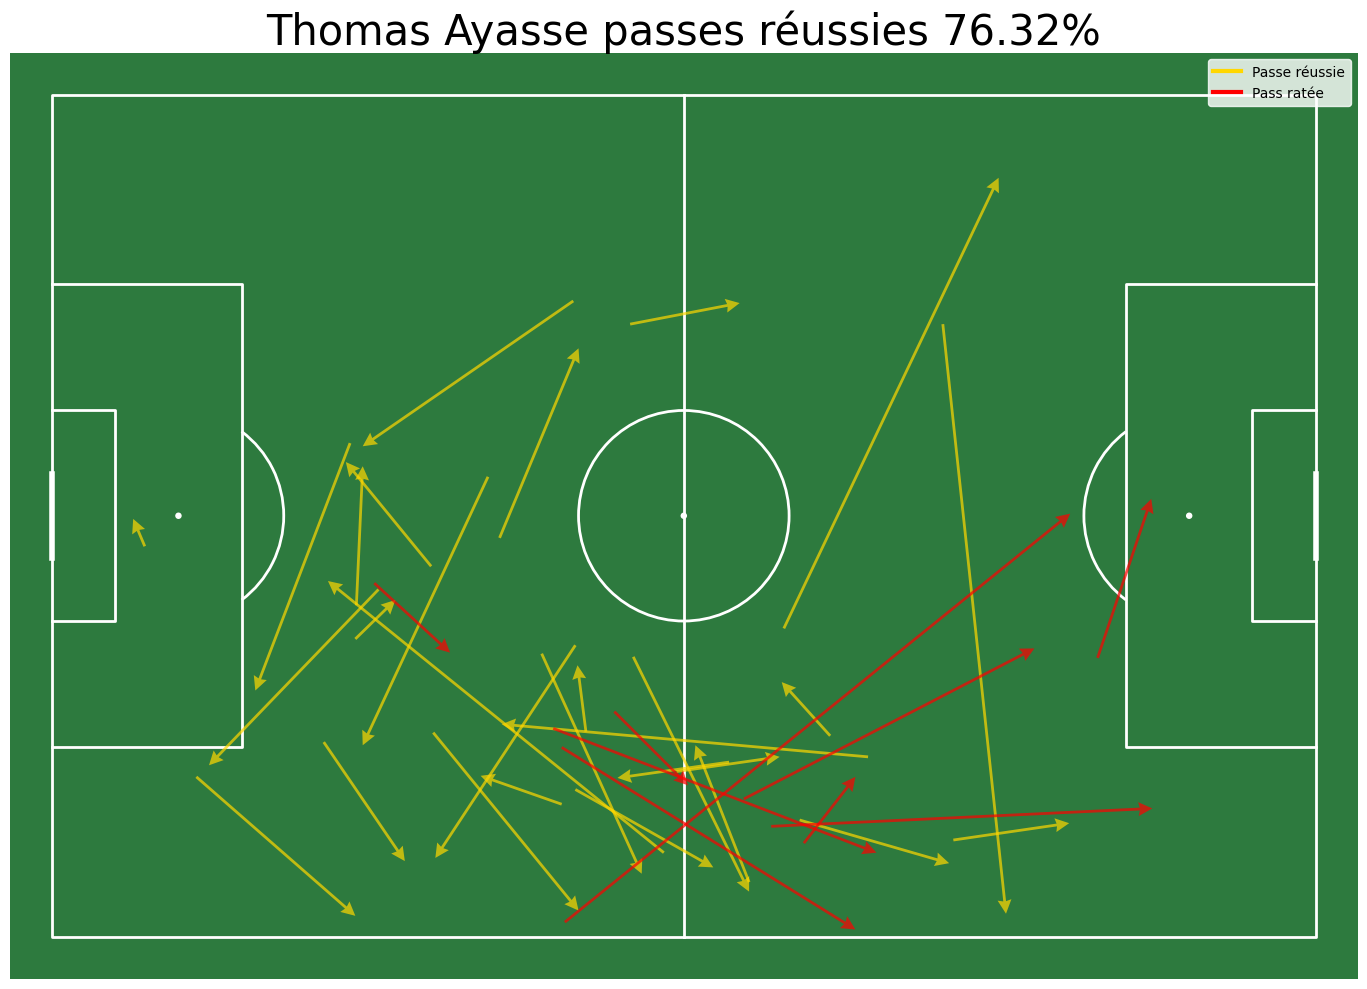

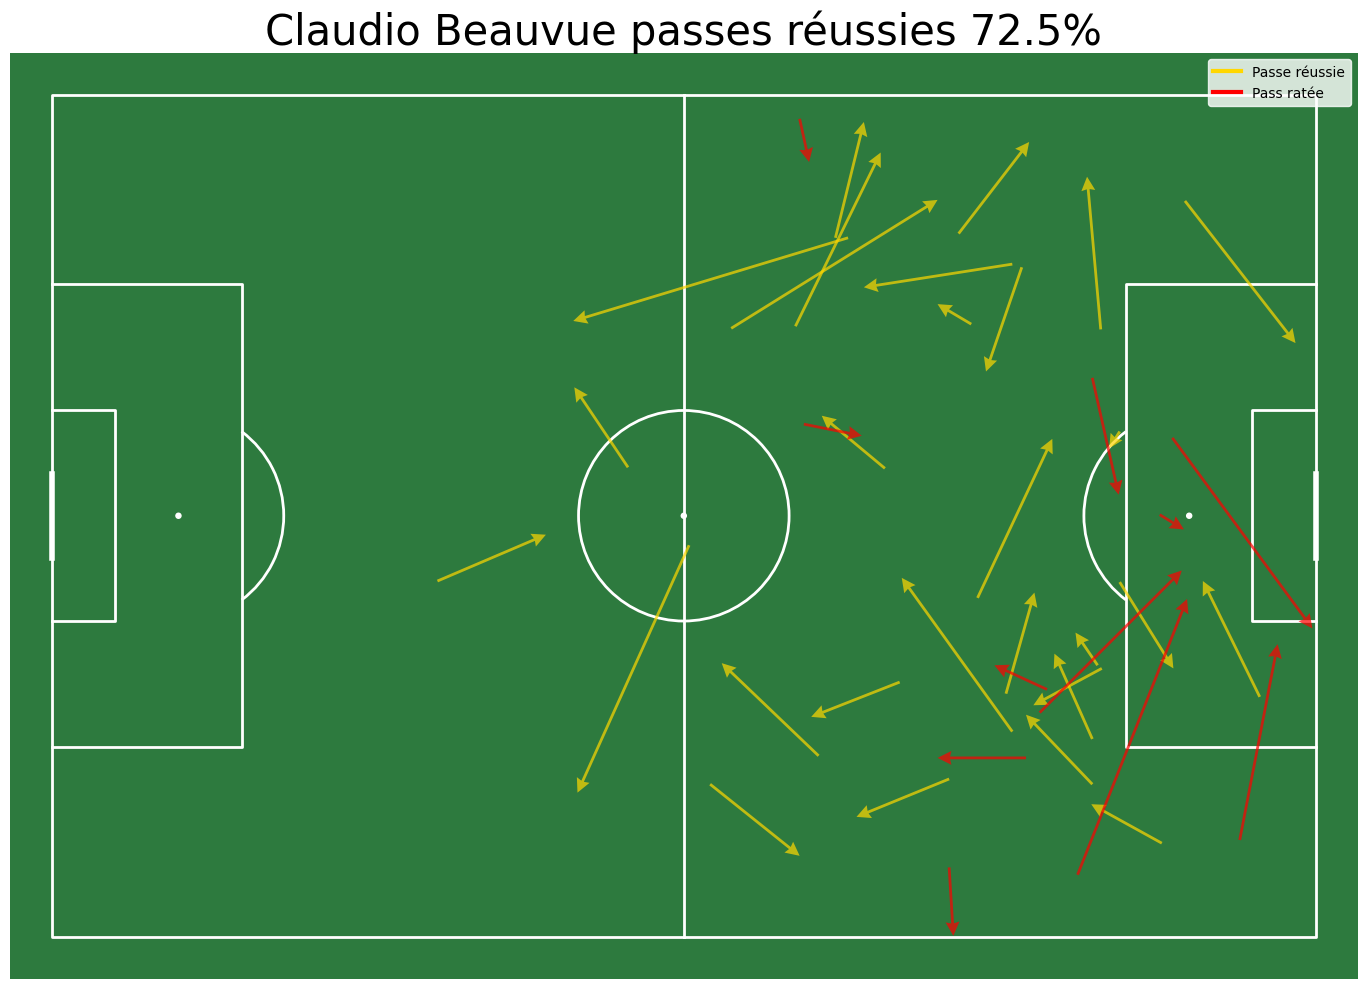

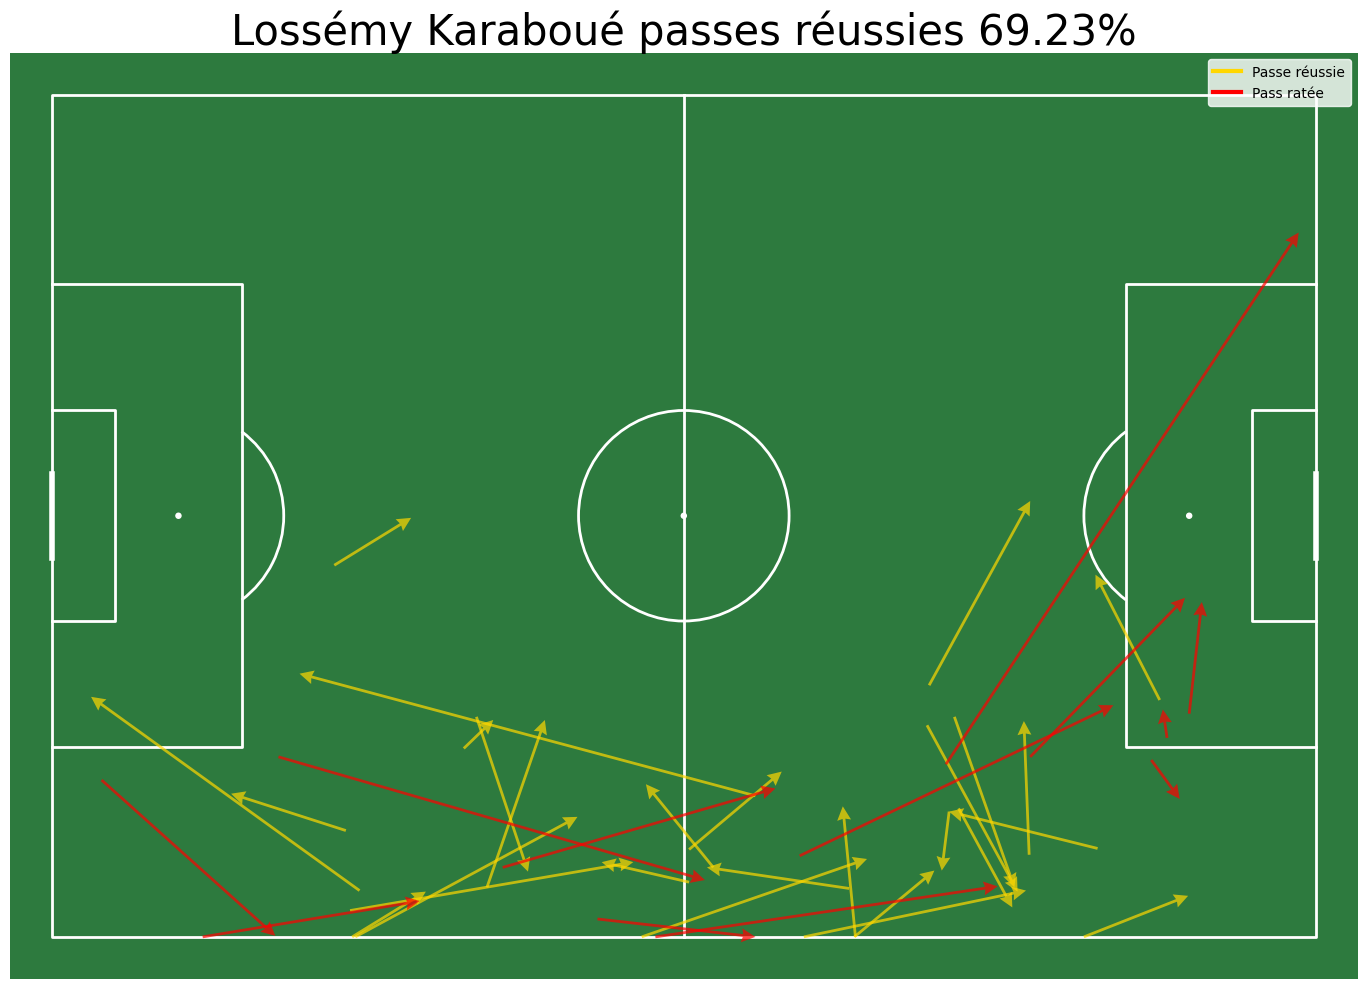

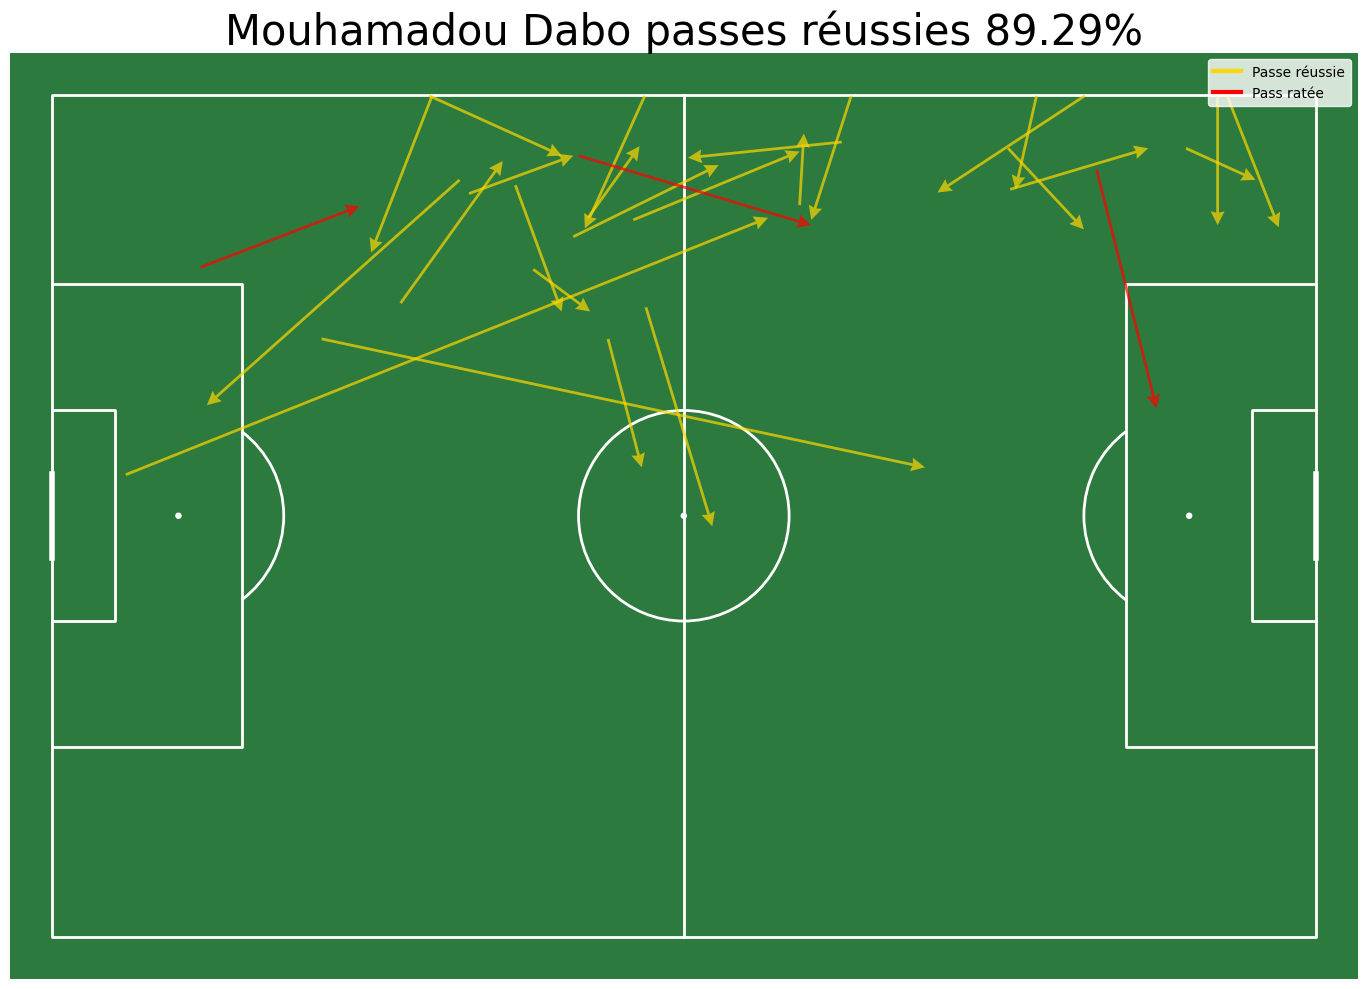

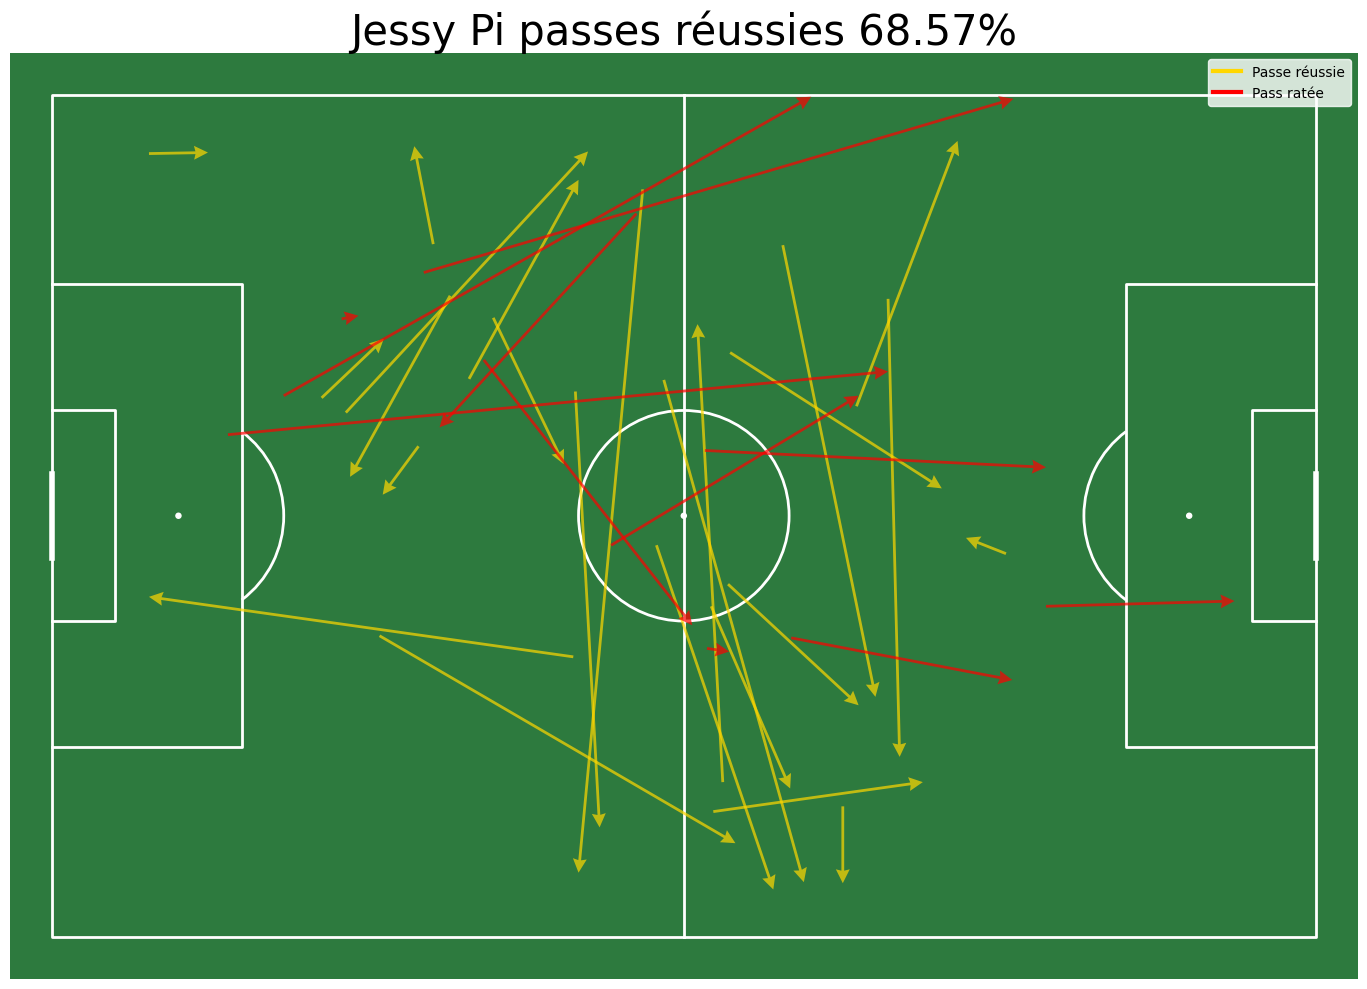

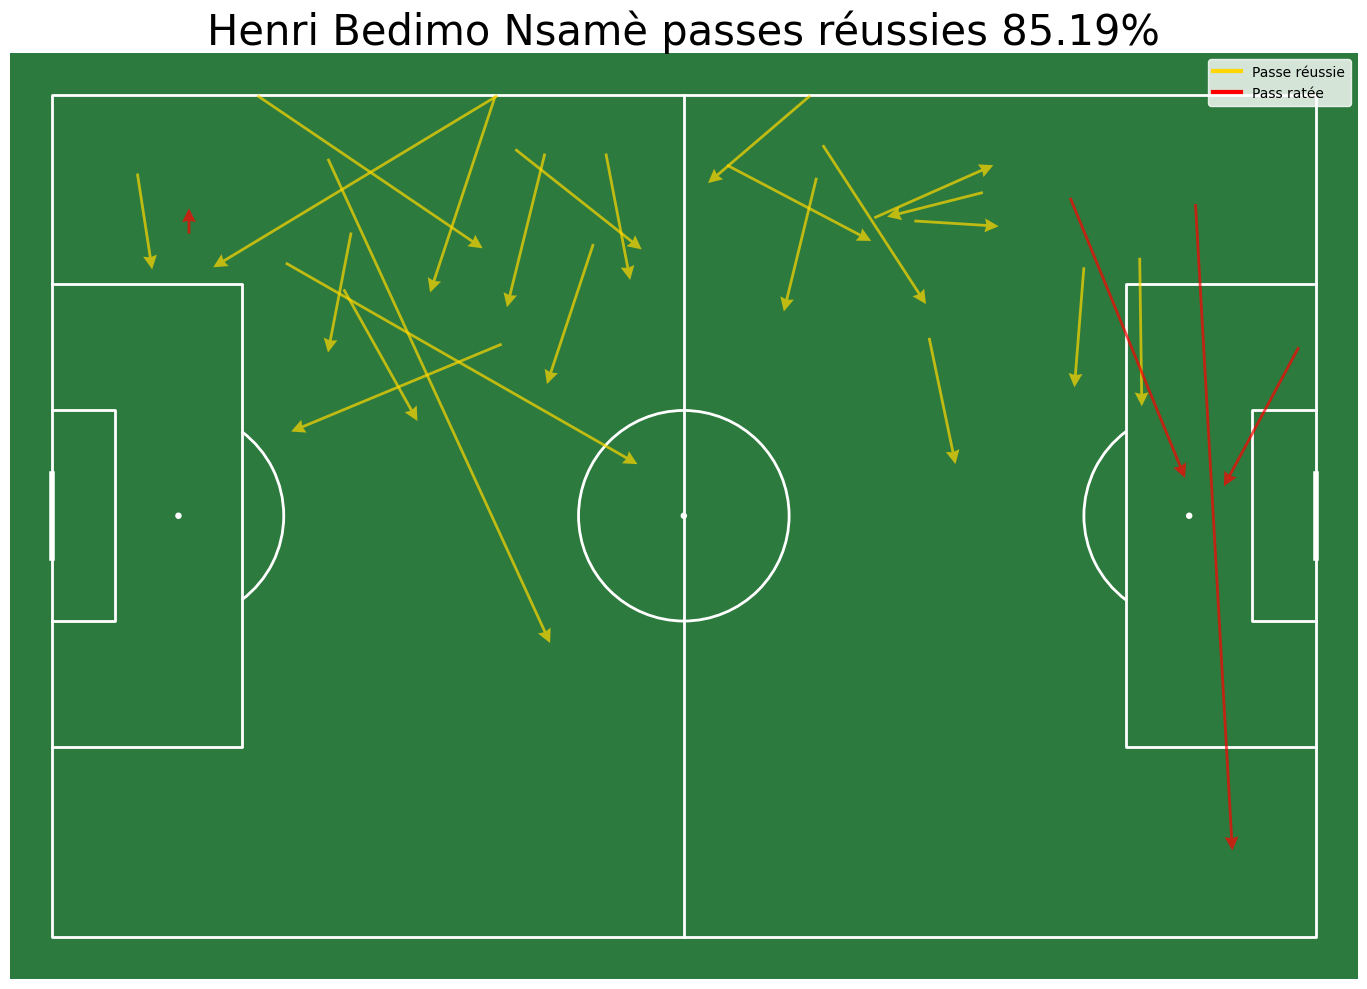

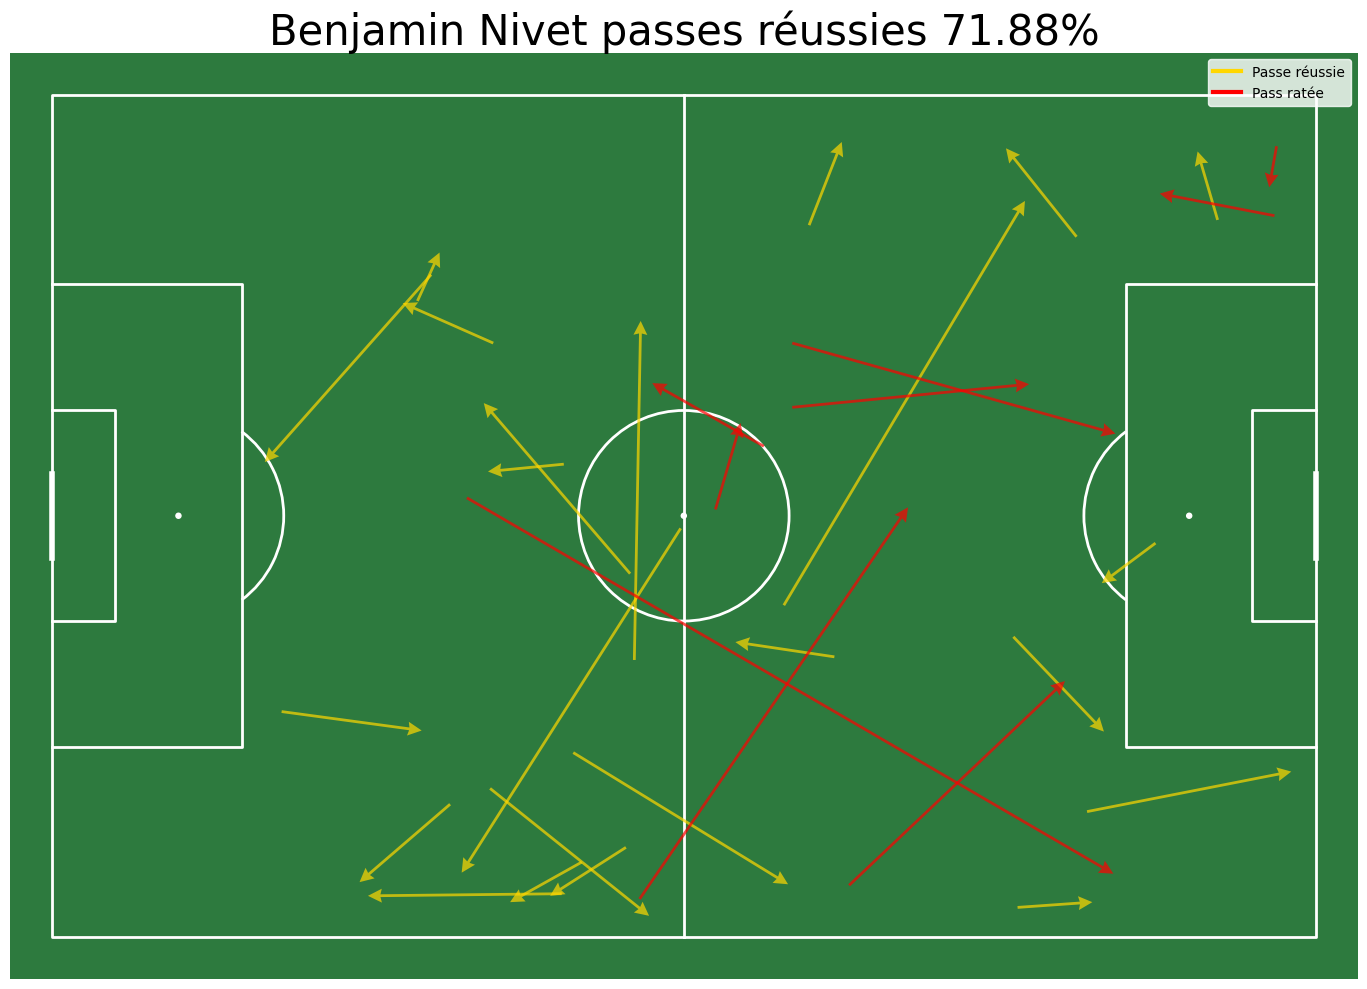

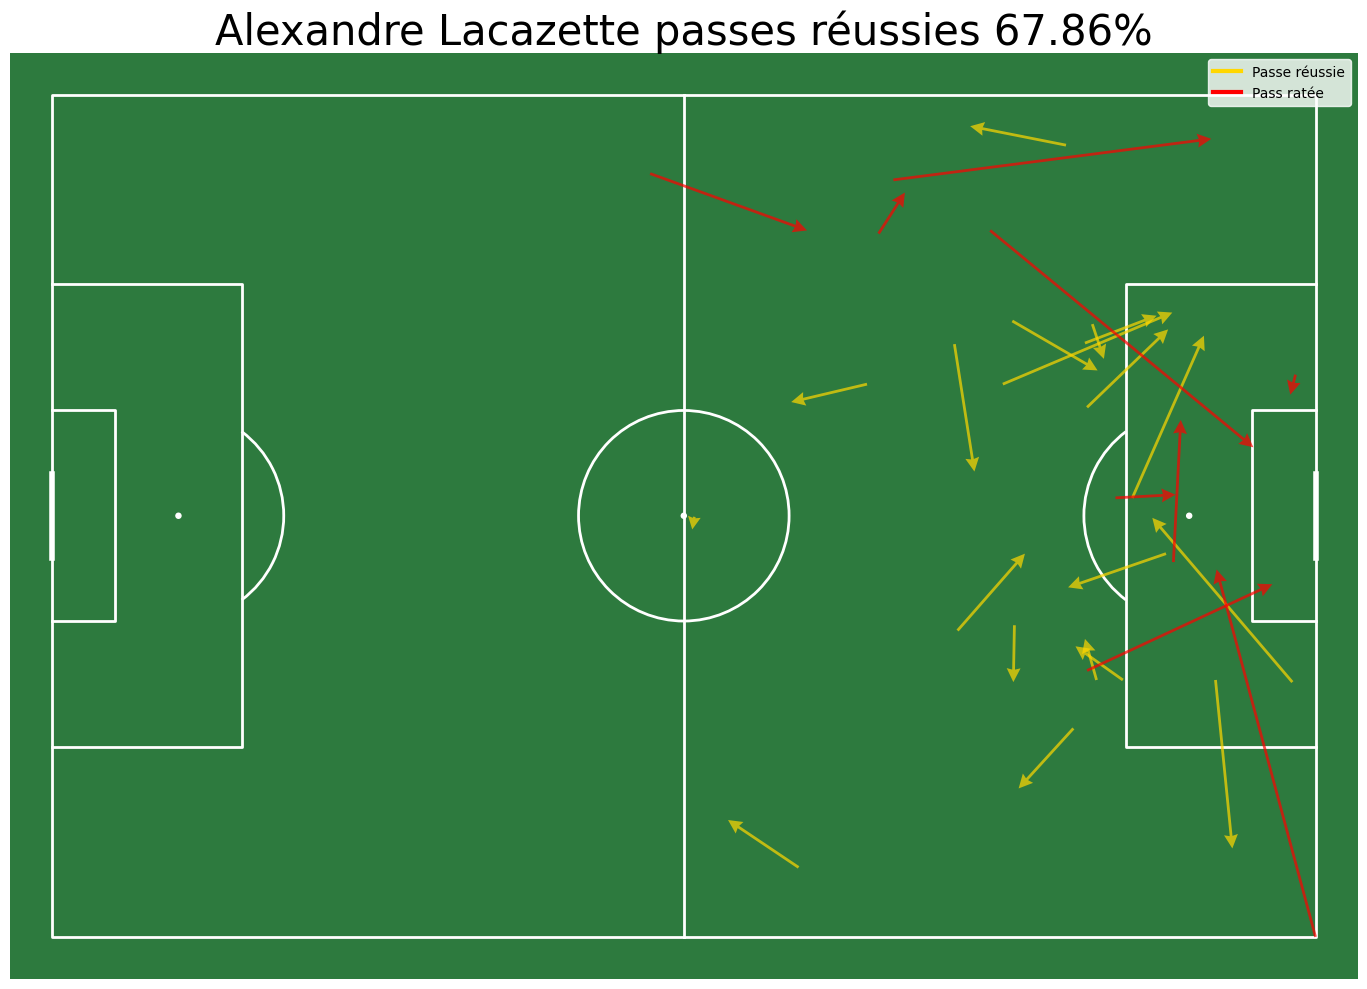

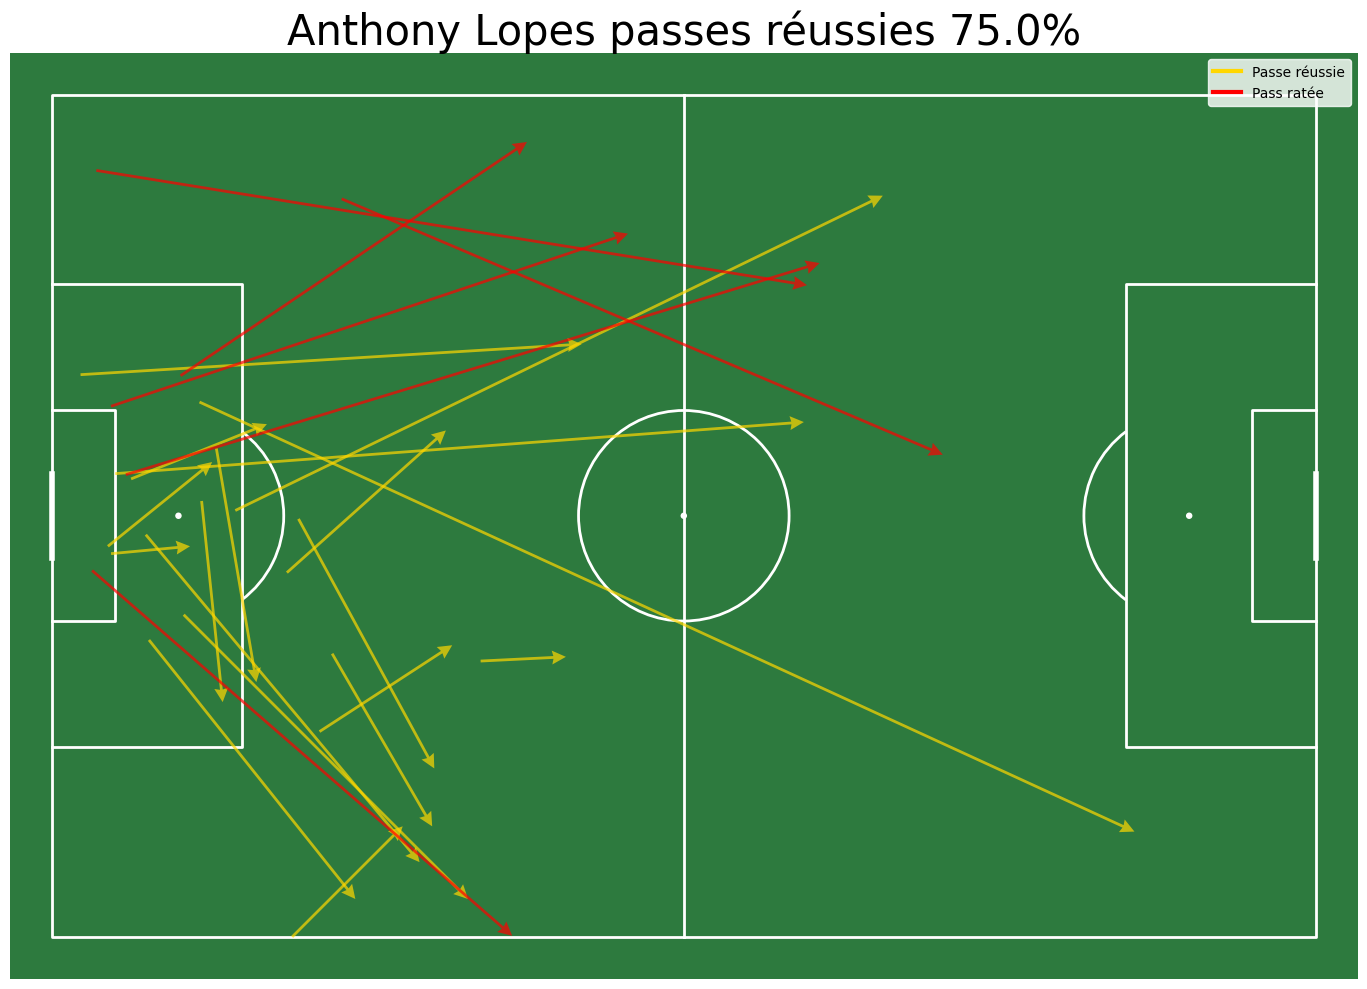

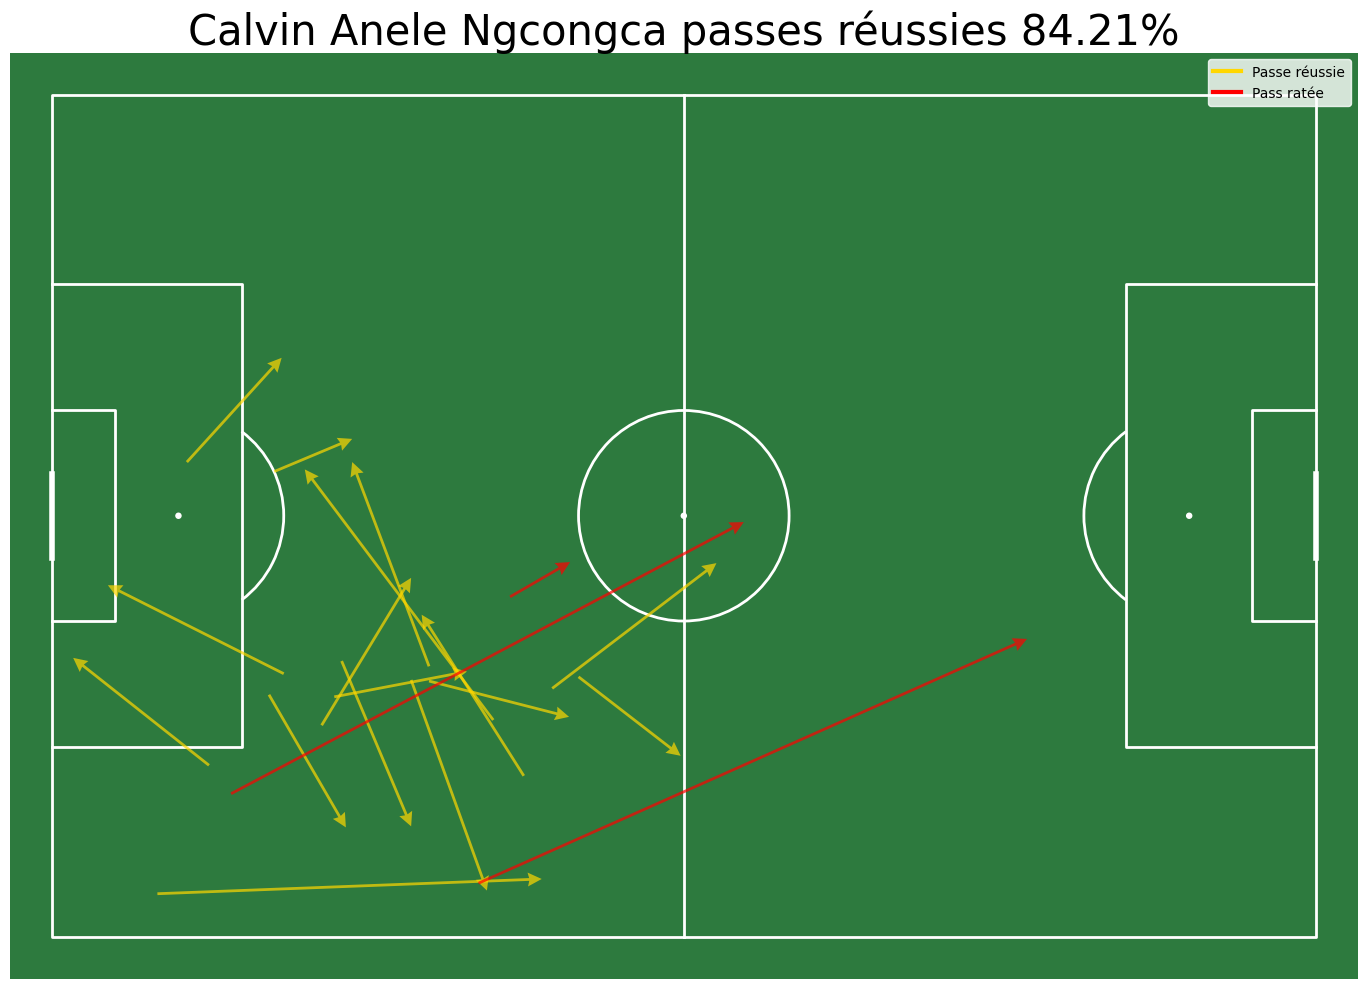

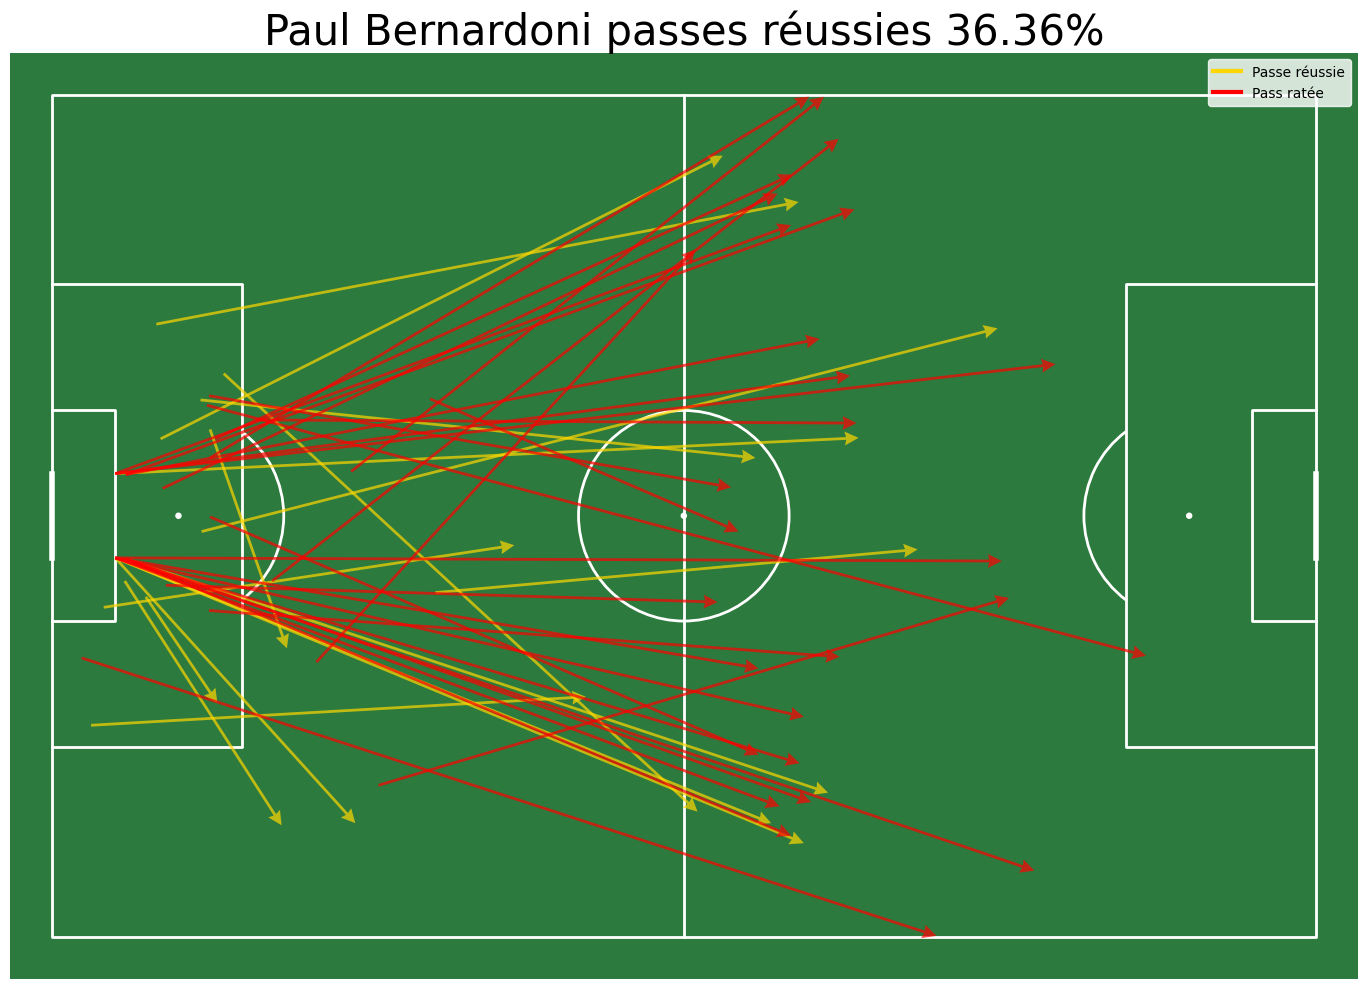

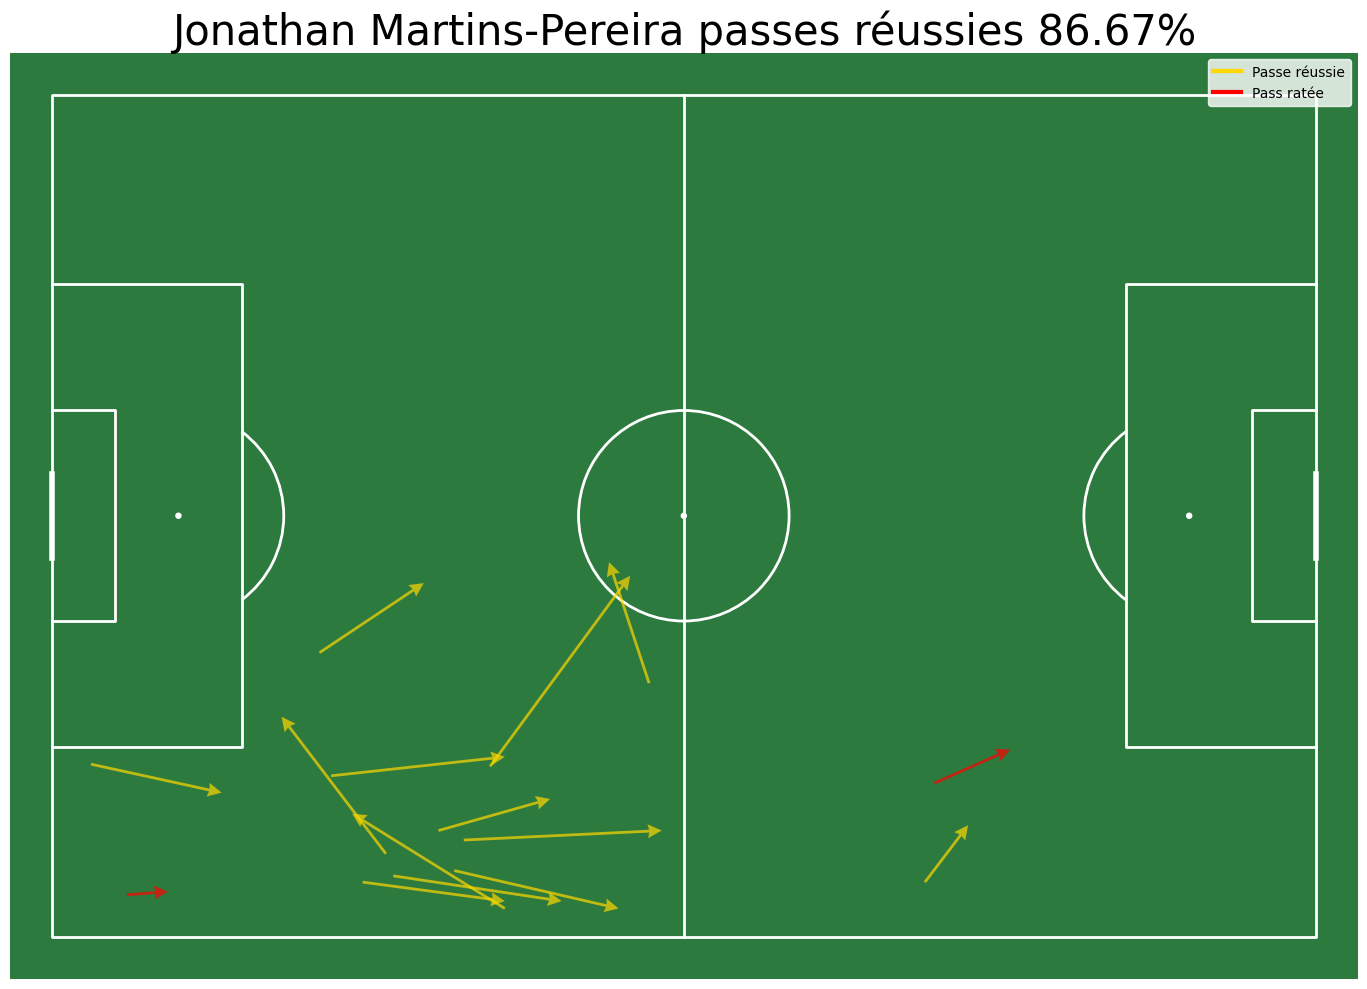

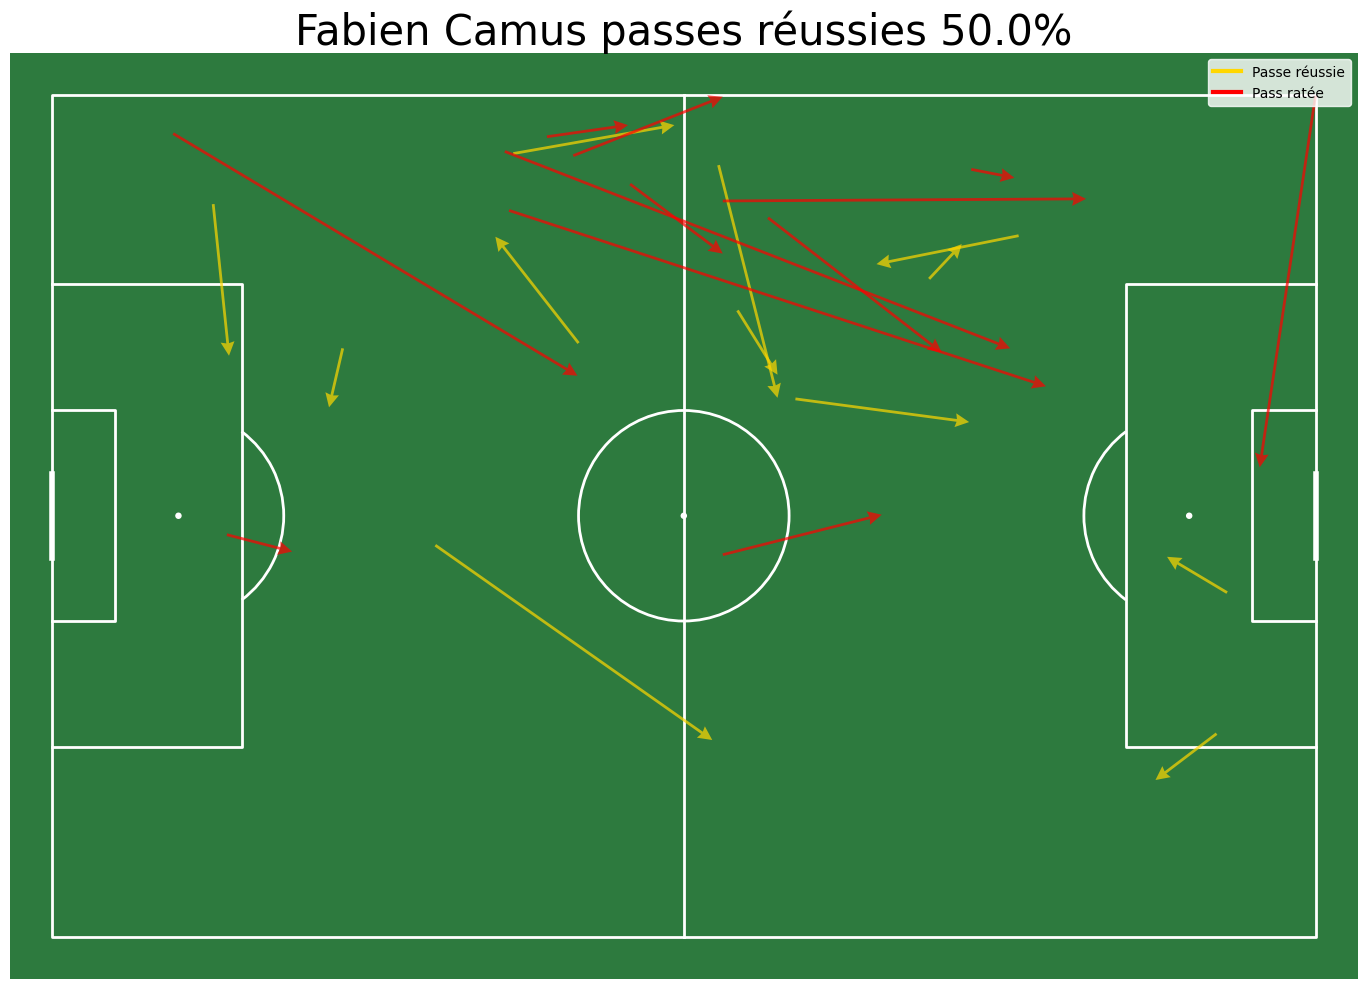

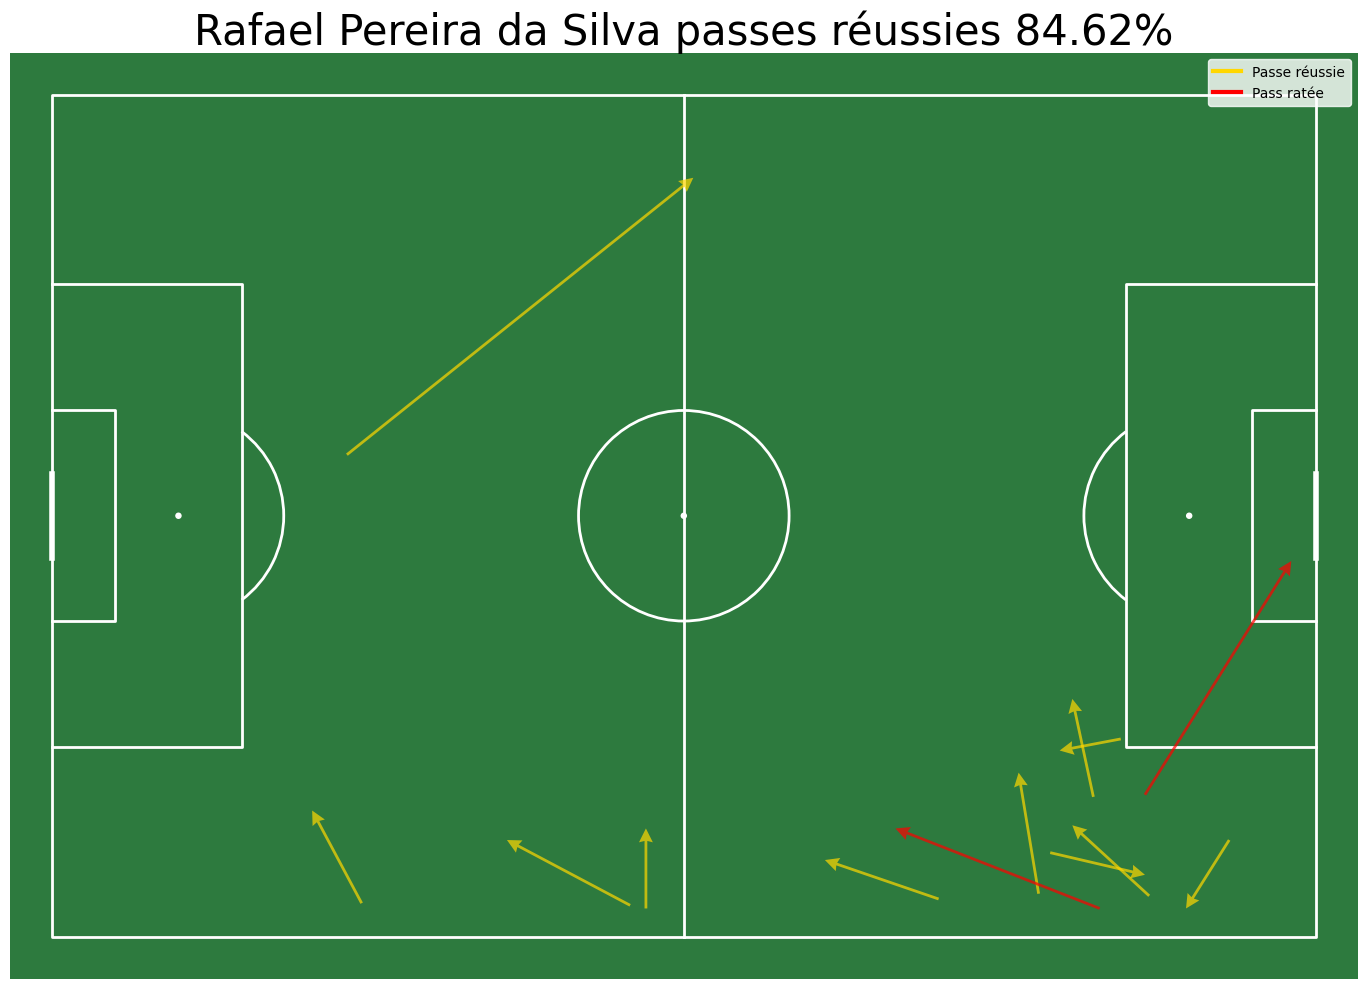

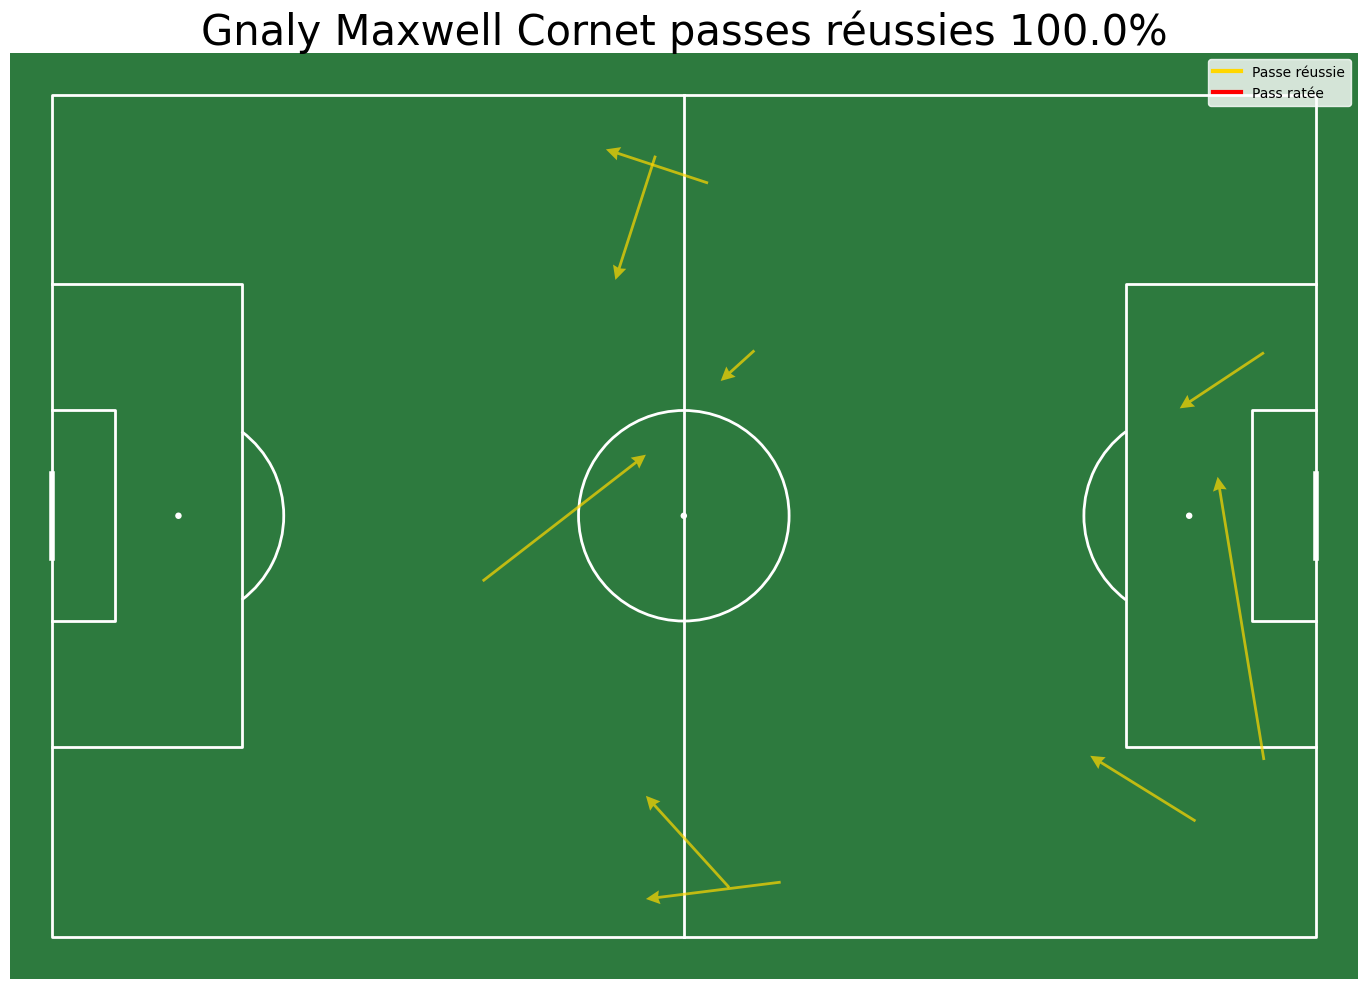

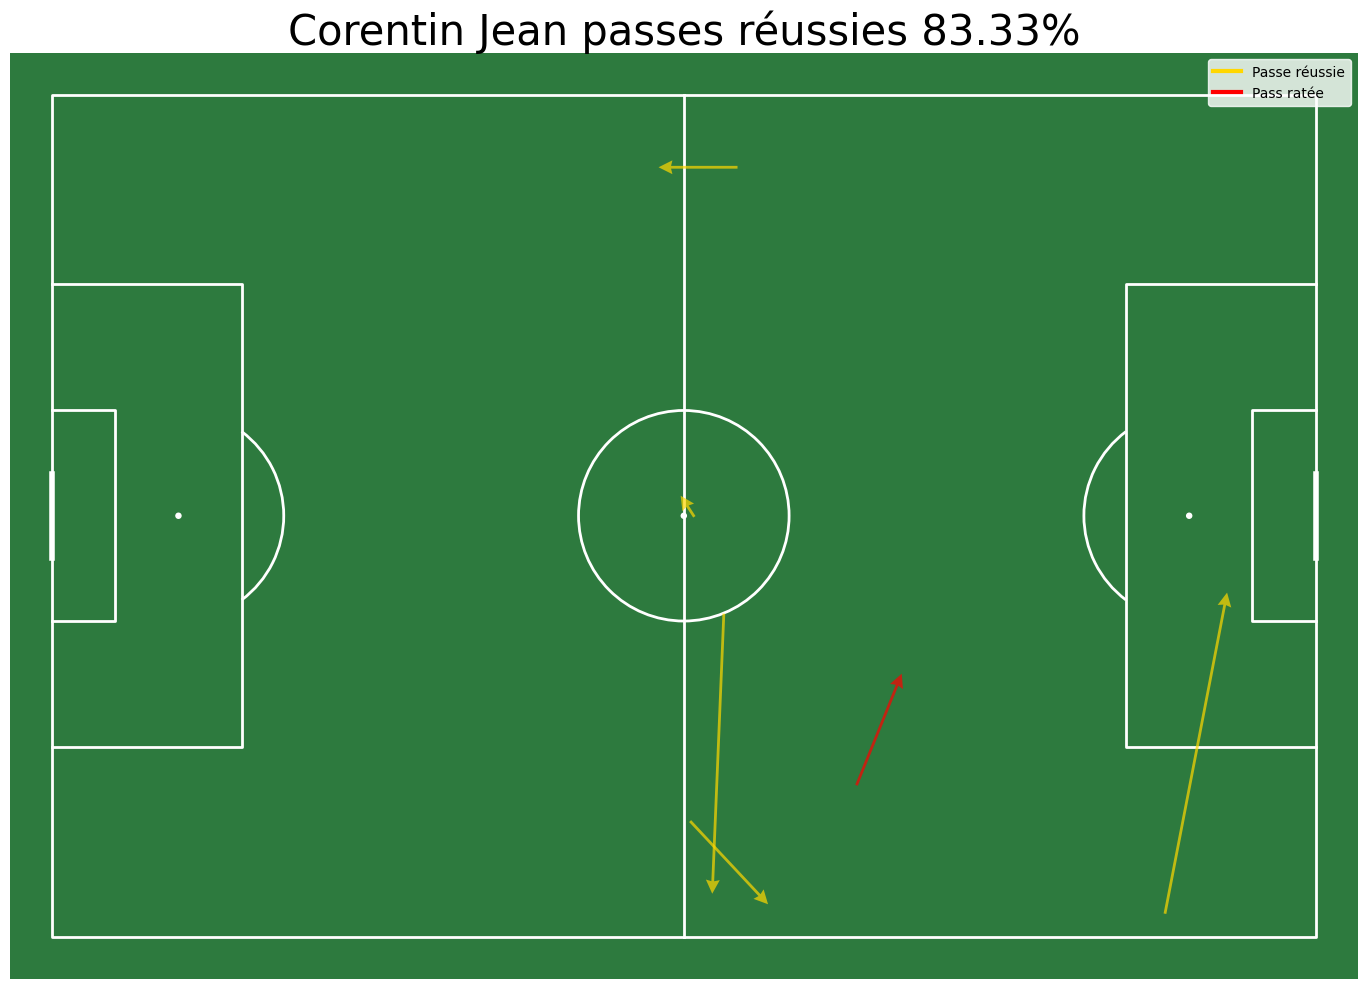

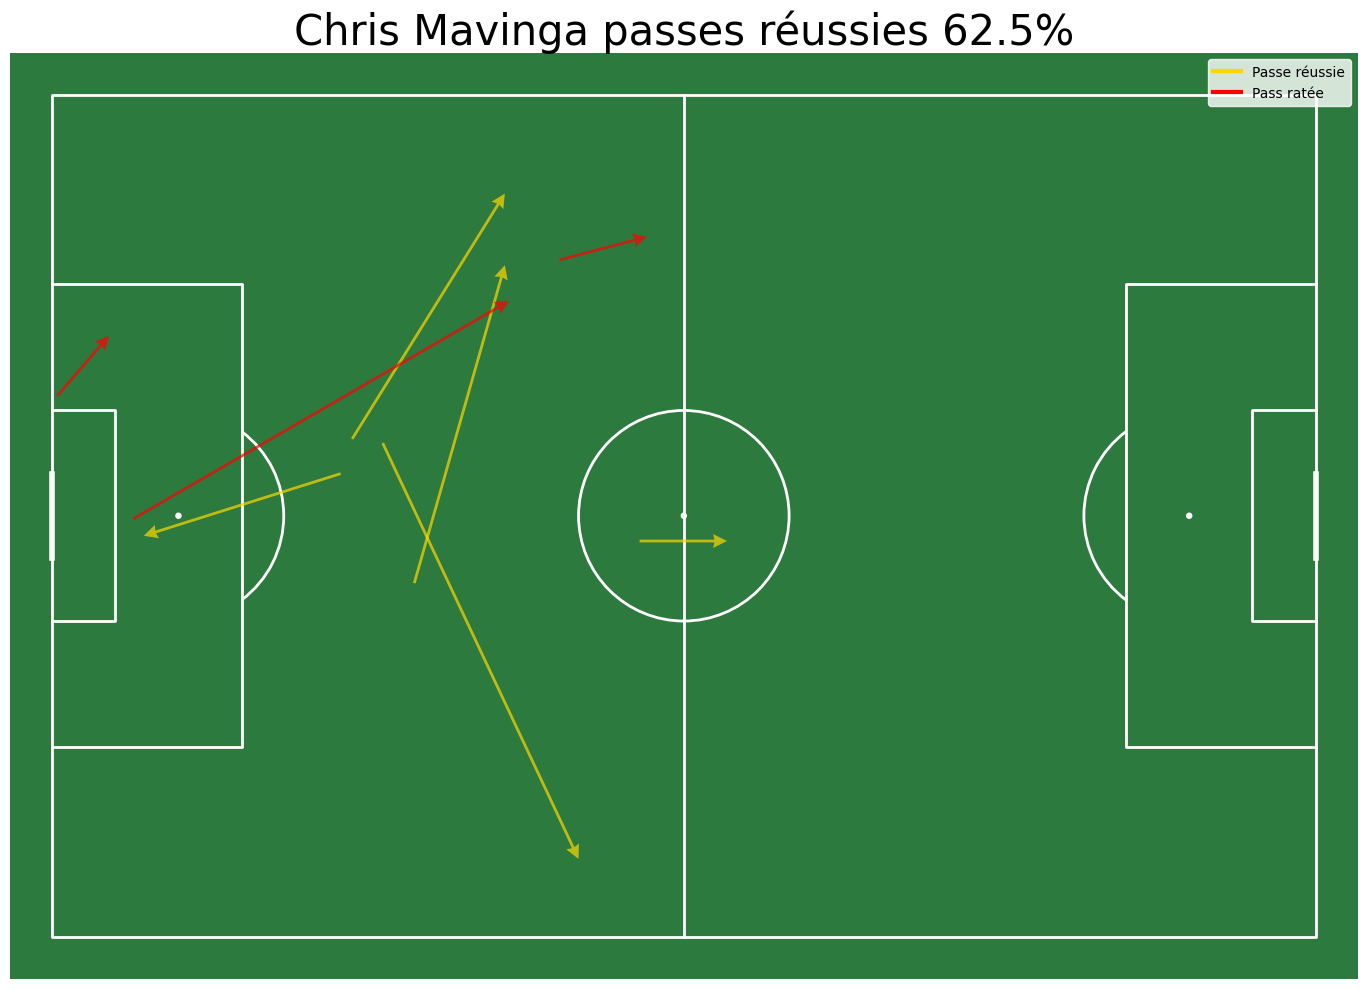

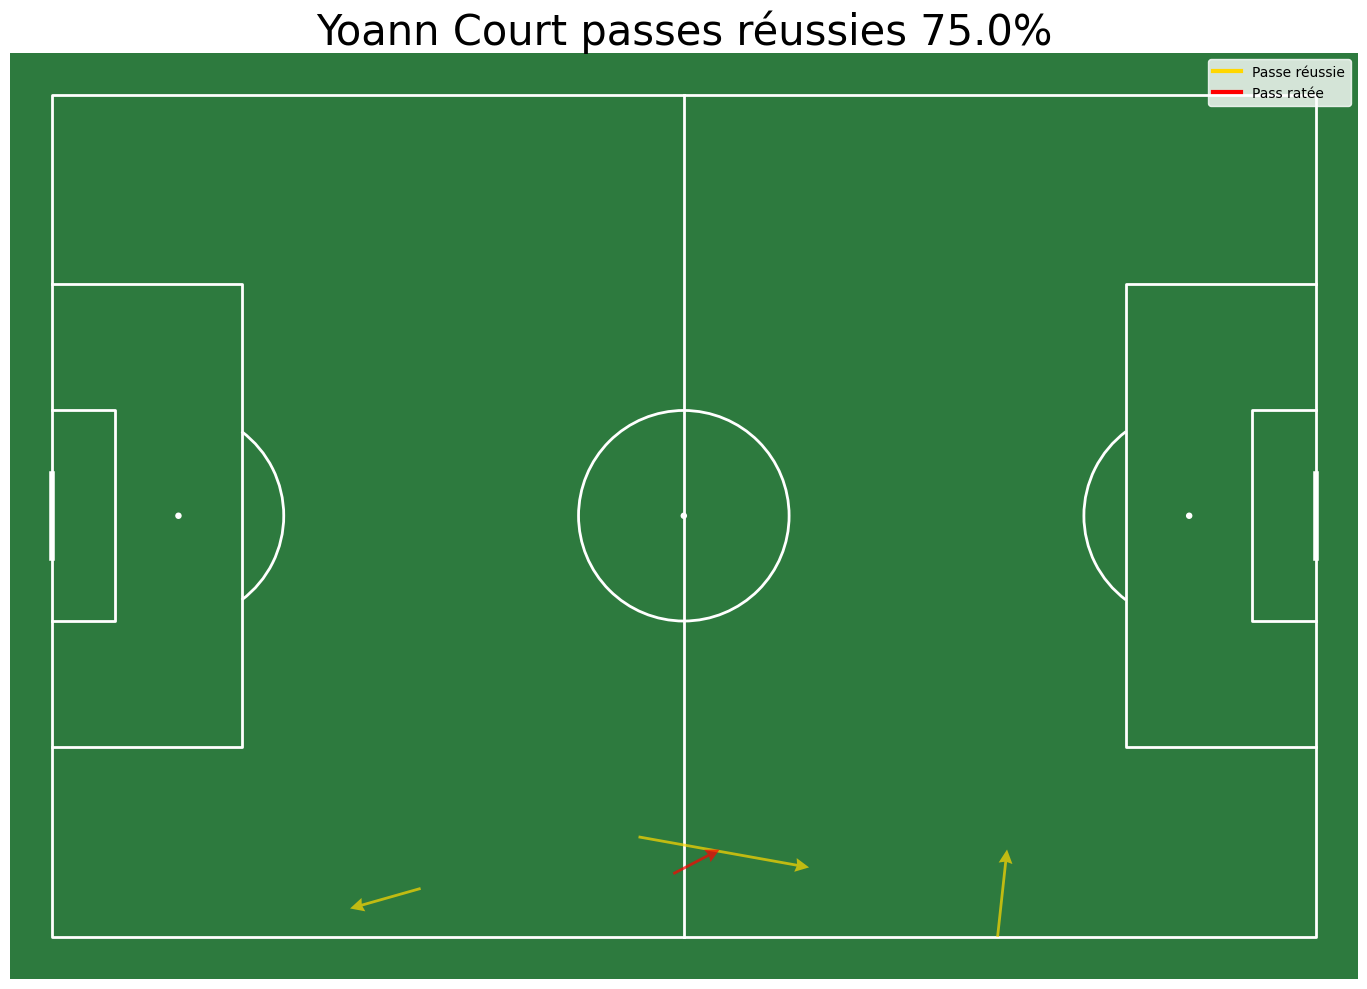

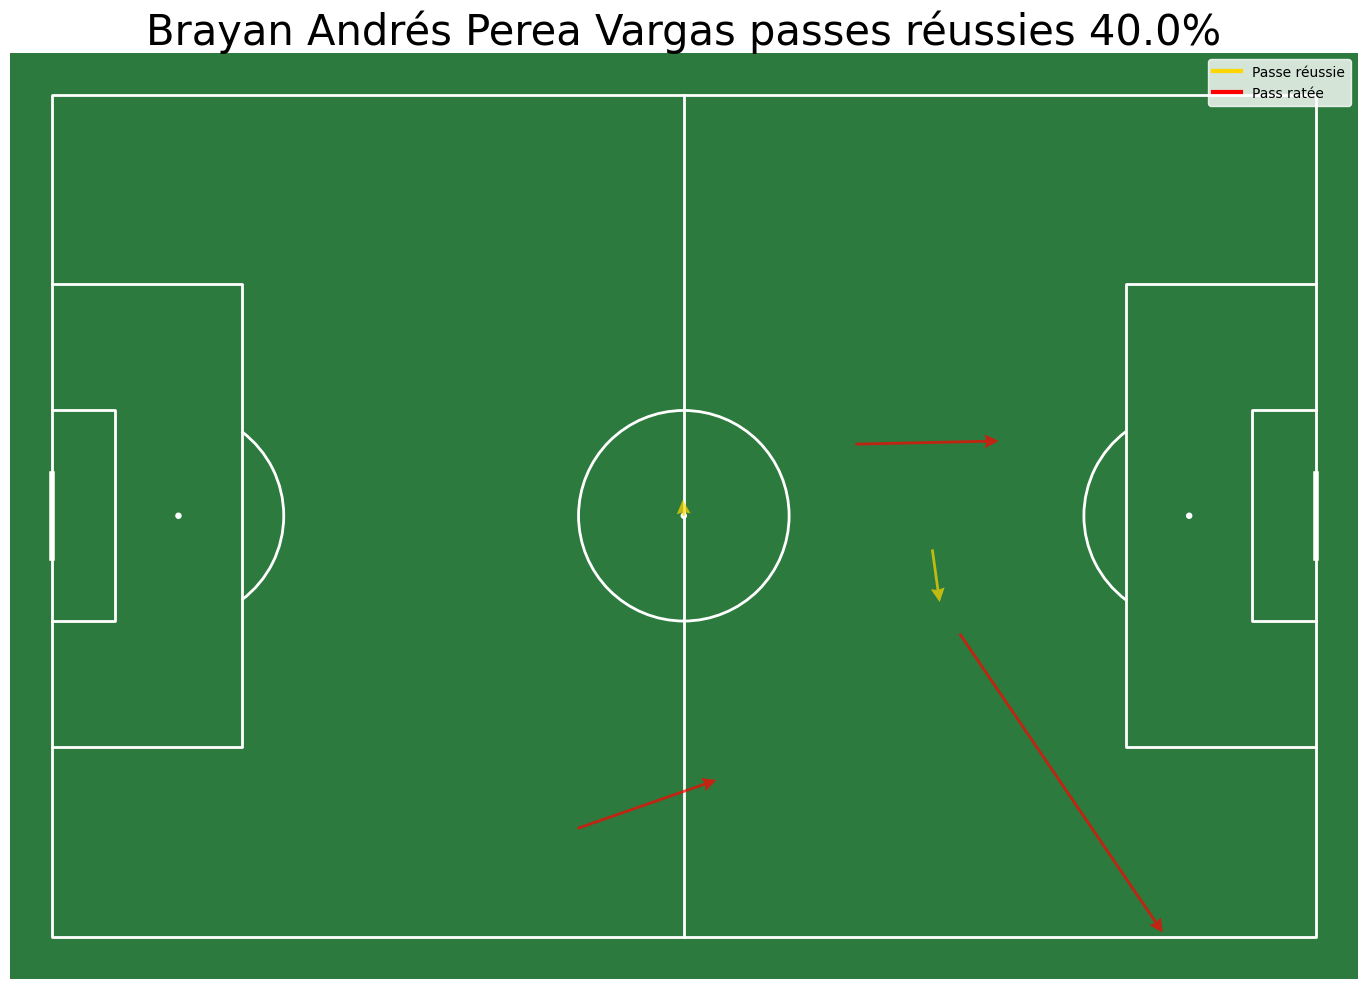

In [32]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.pyplot import Line2D

for i in range(len(stat_df)):
    passeur = stat_df.iloc[i]['joueur']
    passeur_success = stat_df.iloc[i]['passes_réussies']
    passeur_total = stat_df.iloc[i]['passes_totales']
    passeur_taux = stat_df.iloc[i]['taux']

    player_pass = passe[passe['player.name'] == passeur]
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#2d7a3e', line_color='white')
    fig, ax = pitch.draw(figsize=(15, 10))
    
    for p, row in player_pass[player_pass['pass.outcome.name'].isna()].iterrows():
        pitch.arrows(row['location'][0], row['location'][1], row['pass.end_location'][0], row['pass.end_location'][1], width=2, headwidth=5, headlength=5, color='gold', ax=ax, alpha=0.7)
    
    for p, row in player_pass[player_pass['pass.outcome.name'].notna()].iterrows():
        pitch.arrows(row['location'][0], row['location'][1], row['pass.end_location'][0], row['pass.end_location'][1], width=2, headwidth=5, headlength=5, color='red', ax=ax, alpha=0.7)

    i = i+1

    legend_element = [Line2D([0], [0], color='gold', lw=3, label='Passe réussie'), Line2D([0], [0], lw=3, color='red', label='Pass ratée')]
    
    ax.legend(facecolor='white', handles=legend_element, edgecolor='white', fontsize=10, loc='upper right')
    ax_title = ax.set_title(f'{passeur} passes réussies {passeur_taux}%', fontsize=30)
        